# Predicting-COVID-19-condition-and-hospitalization-levels-using-blood-analysis-and-test-results 

**The purpose of the project:**

This projects aims to predict whether the patient has been infected by COVID-19, as well as s/he is hospitalized in one of the three units: regular ward, semi intensive or intensive care unit. 


**Data**: 

The dataset has 404 rows with 39 columns out of which four will be the target variables. The data is per patient.

**Explanatory variables:**

There are three types of features that we will use: 

- ***Patient's age***: This is the only demographic data available in the dataset. we expect this to be highly correlated with the target variables (especially the targets related to hospitalizations) as the prior research suggests.*
- ***Blood test variables***: There are 14 variables obtained from the blood test (hemoglobin, hemotracit level, red blood cells count, etc.) which will form the main base of the features that we will use in the model.
- ***Test result variables***: 19 variables which indicates the different test results. These features have very little variation and contains many missing rows.

    
*https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7755063/pdf/mm6915e3.pdf

### 0. Uploading and first look

In [1]:
#setting the directory
import os
os.getcwd ()
os.chdir()

In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sns.set_style("darkgrid") #setting the style of the seaborn charts
plt.rcParams['figure.dpi'] = 80

In [4]:
#uploading the data
df=pd.read_csv('data_all.csv')

Our first observation is that test result variables such as adenovirus, parainfluenza_4, etc. seem to contain Nulls. Nulls in this context can simply mean that these tests were not performed on the patient:

In [5]:
df.head() #first look into the data

,Id,patient_age_quantile,COVID,regular_ward,semi_intensive_unit,intensive_care_unit,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,adenovirus,parainfluenza_4,coronavirus229e,coronavirusoc43,inf_a_h1n1_2009,bordetella_pertussis,metapneumovirus,parainfluenza_2,influenza_b_rapid_test,influenza_a_rapid_test
0,933,3,0,0,0,0,-0.495919,-0.523588,0.198610,0.459449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,801,1,0,0,0,0,-0.221256,-0.147652,1.643218,-1.111256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4459,19,1,1,0,0,-0.106813,-0.272964,-0.894267,0.796029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,4820,6,0,0,0,0,0.923173,0.541564,0.437284,-0.438097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1293,7,1,0,0,0,0.694287,0.729532,-0.743526,0.235063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


**We look at the summary statistics of the data. Main takeaways are:**

- Patient age quantile is scaled, but it is hard to guess how it was scaled considering that the mean is 11 and standard deviation is 5.6.
- Blood test variables (hematocrit, hemoglobin, plateletes, etc.) seem to be **scaled to the mean of 0 and standard deviation of 1.** They seem to have either no or very small number of missing values.
- Test result variables (adenovirus, parainfluenza_4, etc.) seem have **significant number of missing values:** 158 (39%) out of 404 rows are nulls for the majority of them. For influenza_b_rapid_test and influenza_a_rapid_test, this number is 275 (68%)
- Test result variables apart from Nulls have very little variation and contain mostly 0's 

In [6]:
df.describe() #summary statistics

,Id,patient_age_quantile,COVID,regular_ward,semi_intensive_unit,intensive_care_unit,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,adenovirus,parainfluenza_4,coronavirus229e,coronavirusoc43,inf_a_h1n1_2009,bordetella_pertussis,metapneumovirus,parainfluenza_2,influenza_b_rapid_test,influenza_a_rapid_test
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,403.000000,401.000000,...,246.0,246.000000,246.0,246.000000,246.000000,246.0,246.000000,246.0,129.000000,129.000000
mean,2842.487624,11.086634,0.136139,0.096535,0.069307,0.029703,0.014655,0.009298,-0.034796,0.021308,...,0.0,0.004065,0.0,0.004065,0.044715,0.0,0.016260,0.0,0.054264,0.007752
std,1816.408508,5.615904,0.343361,0.295689,0.254290,0.169977,1.010075,1.009019,1.025830,1.023827,...,0.0,0.063758,0.0,0.063758,0.207100,0.0,0.126732,0.0,0.227420,0.088045
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.501420,-4.345603,-2.552426,-2.457575,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,1045.000000,7.000000,0.000000,0.000000,0.000000,0.000000,-0.541696,-0.648900,-0.617907,-0.774677,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,3002.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.076295,0.040316,-0.165682,-0.101517,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
75%,4608.250000,16.000000,0.000000,0.000000,0.000000,0.000000,0.740064,0.729532,0.481251,0.683835,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
max,5615.000000,19.000000,1.000000,1.000000,1.000000,1.000000,2.662704,2.671868,9.532034,3.713052,...,0.0,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000


**The data is very imbalanced:** Proportion of positives ranges from around 3% (in the case of intensive care unit) to 14% (in the case of COVID):


Text(0, 0.5, 'Mean')

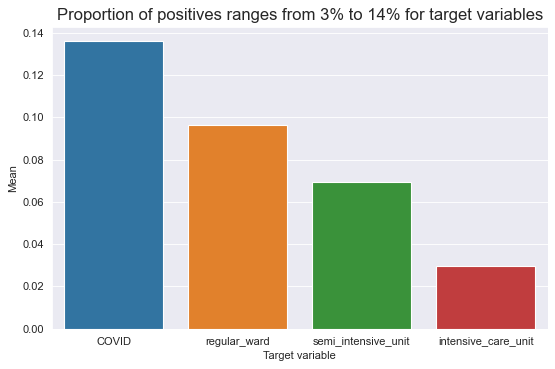

In [7]:
from matplotlib.pyplot import figure

#calculating the mean for 4 target varibales
target_means=df[['COVID','regular_ward','semi_intensive_unit','intensive_care_unit']].mean() 

#plotting
figure(figsize=(8, 5))
sns.barplot(x=target_means.index, y=target_means.values)
plt.title('Proportion of positives ranges from 3% to 14% for target variables',fontsize=15)
plt.xlabel('Target variable')
plt.ylabel('Mean')

## Descriptive analysis


### 1. Analyzing the Nulls

**How many nulls do we have in each column?**

- Target variables and patient's age do not have any missing values
- Blood variables have very few missing values
- Most of the test result variables have 158 missing values with the exception of influenza_b_rapid_test and influenza_a_rapid_test (275 missing values)

In [8]:
for i in df.columns:
    print(str(i) + ' ' + str(df[i].isna().sum()))

Id 0
patient_age_quantile 0
COVID 0
regular_ward 0
semi_intensive_unit 0
intensive_care_unit 0
hematocrit 0
hemoglobin 0
platelets 1
mean_platelet_volume 3
red_blood_cells 1
lymphocytes 1
mean_corpuscular_hemoglobin_concentration_mchc 1
leukocytes 1
basophils 1
mean_corpuscular_hemoglobin_mch 1
eosinophils 1
mean_corpuscular_volume_mcv 1
monocytes 2
red_blood_cell_distribution_width_rdw 1
respiratory_syncytial_virus 158
influenza_a 158
influenza_b 158
parainfluenza_1 158
coronavirusnl63 158
rhinovirus_enterovirus 158
coronavirus_hku1 158
parainfluenza_3 158
chlamydophila_pneumoniae 158
adenovirus 158
parainfluenza_4 158
coronavirus229e 158
coronavirusoc43 158
inf_a_h1n1_2009 158
bordetella_pertussis 158
metapneumovirus 158
parainfluenza_2 158
influenza_b_rapid_test 275
influenza_a_rapid_test 275


**Are nulls coinciding in columns with 158 nulls?**

Yes, they are coinciding. So either all or none of the tests were performed on the patients. This means that we can just use the Nulls for one of these features, using multiple of would not add value

In [9]:
df[df['respiratory_syncytial_virus'].isna()][['influenza_a','influenza_b','parainfluenza_1','coronavirusnl63',
                                              'rhinovirus_enterovirus','coronavirus_hku1','parainfluenza_3',
                                              'chlamydophila_pneumoniae','adenovirus','parainfluenza_4','coronavirus229e',
                                              'coronavirusoc43','inf_a_h1n1_2009','bordetella_pertussis','metapneumovirus',
                                              'parainfluenza_2']].describe()

,influenza_a,influenza_b,parainfluenza_1,coronavirusnl63,rhinovirus_enterovirus,coronavirus_hku1,parainfluenza_3,chlamydophila_pneumoniae,adenovirus,parainfluenza_4,coronavirus229e,coronavirusoc43,inf_a_h1n1_2009,bordetella_pertussis,metapneumovirus,parainfluenza_2
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Are target variables correlated with NULLs?

When the test variable is Null, we suppose it means that the patient was not tested. This in itself can provide an insight about whether the patient has COVID or was hospitalized. 

In [10]:
#We create Nulls variable which takes 1 when the test variable is Null

df['Nulls'] = df['parainfluenza_4'].apply(lambda x: 1 if pd.isna(x) else 0) 

In [11]:
#Calculating the means of target variables when Nulls=1 and when Nulls=0

a_1=[]
a_0=[]

target_variables=['COVID','regular_ward','semi_intensive_unit','intensive_care_unit']
for i in target_variables:
    a_1.append(df[df['Nulls']==1][i].mean())

for i in target_variables:
    a_0.append(df[df['Nulls']==0][i].mean())

for_plot=pd.DataFrame(list(zip(target_variables, a_1,a_0)),columns=['Target_variable','Null','Not Null'])

Text(0.5, 1.0, 'Test variable being Null is correlated with target variables')

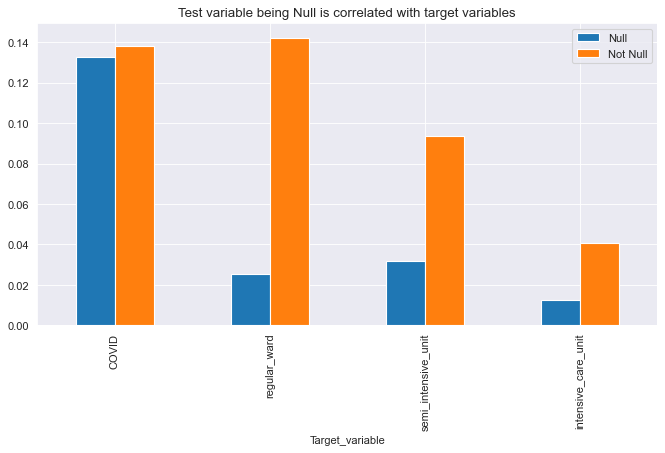

In [12]:
#plotting
for_plot.plot(x='Target_variable',y=['Null','Not Null'],kind='bar',figsize=(10,5))
plt.title('Test variable being Null is correlated with target variables')

**Conclusion**: Nulls variable is correlated with targets, especially with the ones related to hospitalization. This is why, we will include it in the model.

#### Is the same true for influenza_a_rapid_test and influenza_b_rapid_test?

These two test variables have more Nulls than others and they are not necessarily coinciding with other test variables. Can they add more information? 

In [13]:
#influenza_a_rapid_test and influenza_b_rapid_test Nulls are coinciding

df[df['influenza_a_rapid_test'].isna()][['influenza_b_rapid_test']].describe()

,influenza_b_rapid_test
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [14]:
#We create Nulls variable which takes 1 when the test variable is Null

df['Nulls_influenza_a'] = df['influenza_a_rapid_test'].apply(lambda x: 1 if pd.isna(x) else 0) 

In [15]:
#Calculating the means of target variables when Nulls_influenza_a=1 and when Nulls_influenza_a=0

a_1=[]
a_0=[]

target_variables=['COVID','regular_ward','semi_intensive_unit','intensive_care_unit']
for i in target_variables:
    a_1.append(df[df['Nulls_influenza_a']==1][i].mean())

for i in target_variables:
    a_0.append(df[df['Nulls_influenza_a']==0][i].mean())

for_plot=pd.DataFrame(list(zip(target_variables, a_1,a_0)),columns=['Target_variable',
                                                                    'Null influenza a/b test','Not Null influenza a/b test'])

Text(0.5, 1.0, 'Influenza_a_rapid_test being Null is correlated with target variables')

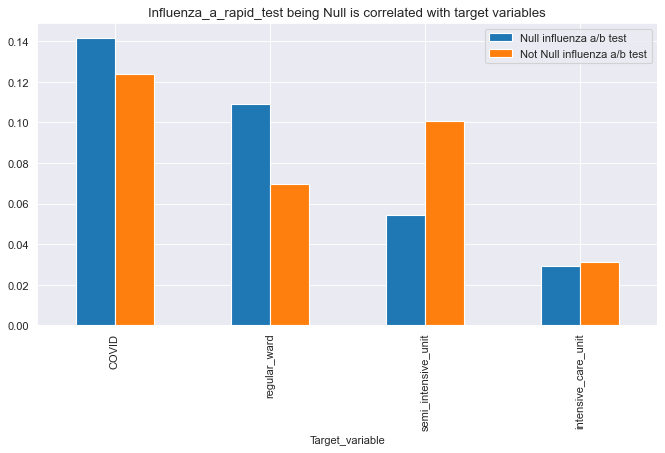

In [16]:
#plotting
for_plot.plot(x='Target_variable',y=['Null influenza a/b test','Not Null influenza a/b test'],kind='bar',figsize=(10,5))
plt.title('Influenza_a_rapid_test being Null is correlated with target variables')

**Conclusion:** We think that although the correlation is not as obvious as before for rapid influenza tests, we can still use it in our model.

### 2. Analyzing the age percentile

#### Is age percentile correlated with the targets?

Text(0.5, 0.98, 'Is age correlated with having Covid or being hospitalized?')

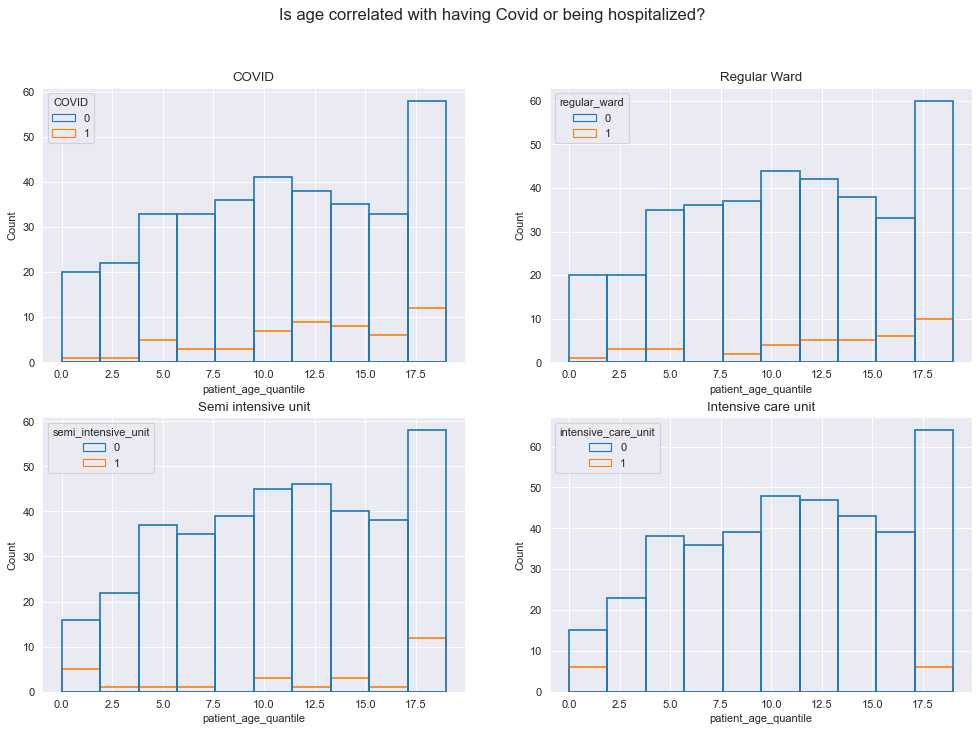

In [16]:
fig, axes = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(15)
    
sns.histplot(data=df,x='patient_age_quantile',hue='COVID',fill=False,ax=axes[0,0])
sns.histplot(data=df,x='patient_age_quantile',hue='regular_ward',fill=False,ax=axes[0,1])
sns.histplot(data=df,x='patient_age_quantile',hue='semi_intensive_unit',fill=False,ax=axes[1,0])
sns.histplot(data=df,x='patient_age_quantile',hue='intensive_care_unit',fill=False,ax=axes[1,1])

axes[0,0].title.set_text('COVID')
axes[0,1].title.set_text('Regular Ward')
axes[1,0].title.set_text('Semi intensive unit')
axes[1,1].title.set_text('Intensive care unit')

fig.suptitle('Is age correlated with having Covid or being hospitalized?',fontsize=15)



**Conclusion:** We see that age variables correlates positively with Covid and regular ward to small extent, but we do not see anything clear for semi intensive and intensive care. To confirm this we look at the correlation matrix: 

<AxesSubplot:>

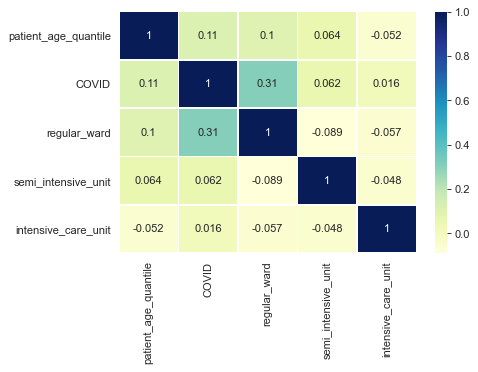

In [17]:
sns.heatmap(df[['patient_age_quantile','COVID', 'regular_ward','semi_intensive_unit','intensive_care_unit']].corr(),
                annot=True,cmap="YlGnBu",linewidths=.5)

### 3. Blood test variables

#### These variables are available for almost every observation, so they should be the main features of the model: 

hematocrit,
hemoglobin,
platelets,
mean_platelet_volume,
red_blood_cells,
lymphocytes,
mean_corpuscular_hemoglobin_concentration_mchc,
leukocytes,
basophils,
mean_corpuscular_hemoglobin_mch,
eosinophils,
mean_corpuscular_volume_mcv,
monocytes,
red_blood_cell_distribution_width_rdw

#### Research shows that blood variables such as red blood count, hemoglobin, hematocrit should be correlated with COVID: 

For example, Djakpo et al. (2020) analyzes CBCs (Complete Blood Count) of 208 mild and common COVID-19 cases and finds that the most likely laboratory findings in the patients were abnormalities in RBCs, HGB, HCT, and CRP. They conclude that clinicians should consider these parameters when reading the CBC of COVID-19 patients.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7414516/

In [18]:
#We define the list of features related to the blood count

blood_variables_list=['hematocrit',
'hemoglobin',
'platelets',
'mean_platelet_volume',
'red_blood_cells',
'lymphocytes',
'mean_corpuscular_hemoglobin_concentration_mchc',
'leukocytes',
'basophils',
'mean_corpuscular_hemoglobin_mch',
'eosinophils',
'mean_corpuscular_volume_mcv',
'monocytes',
'red_blood_cell_distribution_width_rdw']

df[blood_variables_list].describe()

,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw
count,404.000000,404.000000,403.000000,401.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,402.000000,403.000000
mean,0.014655,0.009298,-0.034796,0.021308,0.003134,0.069627,-0.015545,-0.079005,0.037731,0.010205,0.004038,0.019027,0.002601,-0.005000
std,1.010075,1.009019,1.025830,1.023827,1.015078,1.006006,1.022547,0.924265,1.046191,0.971230,0.941643,0.961166,1.016444,1.022911
min,-4.501420,-4.345603,-2.552426,-2.457575,-3.970608,-1.865070,-4.535603,-2.020303,-1.140144,-5.519430,-0.835508,-4.941344,-2.084932,-1.598094
25%,-0.541696,-0.648900,-0.617907,-0.774677,-0.567950,-0.671003,-0.602266,-0.658126,-0.529226,-0.501356,-0.666950,-0.514813,-0.640455,-0.625073
50%,0.076295,0.040316,-0.165682,-0.101517,0.049113,0.028378,-0.054585,-0.269926,-0.223767,0.125903,-0.287696,0.066045,-0.115191,-0.182790
75%,0.740064,0.729532,0.481251,0.683835,0.683806,0.676585,0.642463,0.350636,0.387152,0.596348,0.344395,0.636887,0.534823,0.259492
max,2.662704,2.671868,9.532034,3.713052,3.645706,3.764100,3.331071,4.455255,11.078219,4.098546,4.221218,3.410980,4.533397,6.982184


#### There are only couple of rows with NULLs, we fill them with average:


In [19]:
df[blood_variables_list]=df[blood_variables_list].fillna(df[blood_variables_list].mean())

**We check the pairplot for the blood count variables. Main takeaways:**

- Most of the blood count variables are distributed normally. 
- Some of them are very correlated with each other (e.g. hemoglobin and hemotracit)

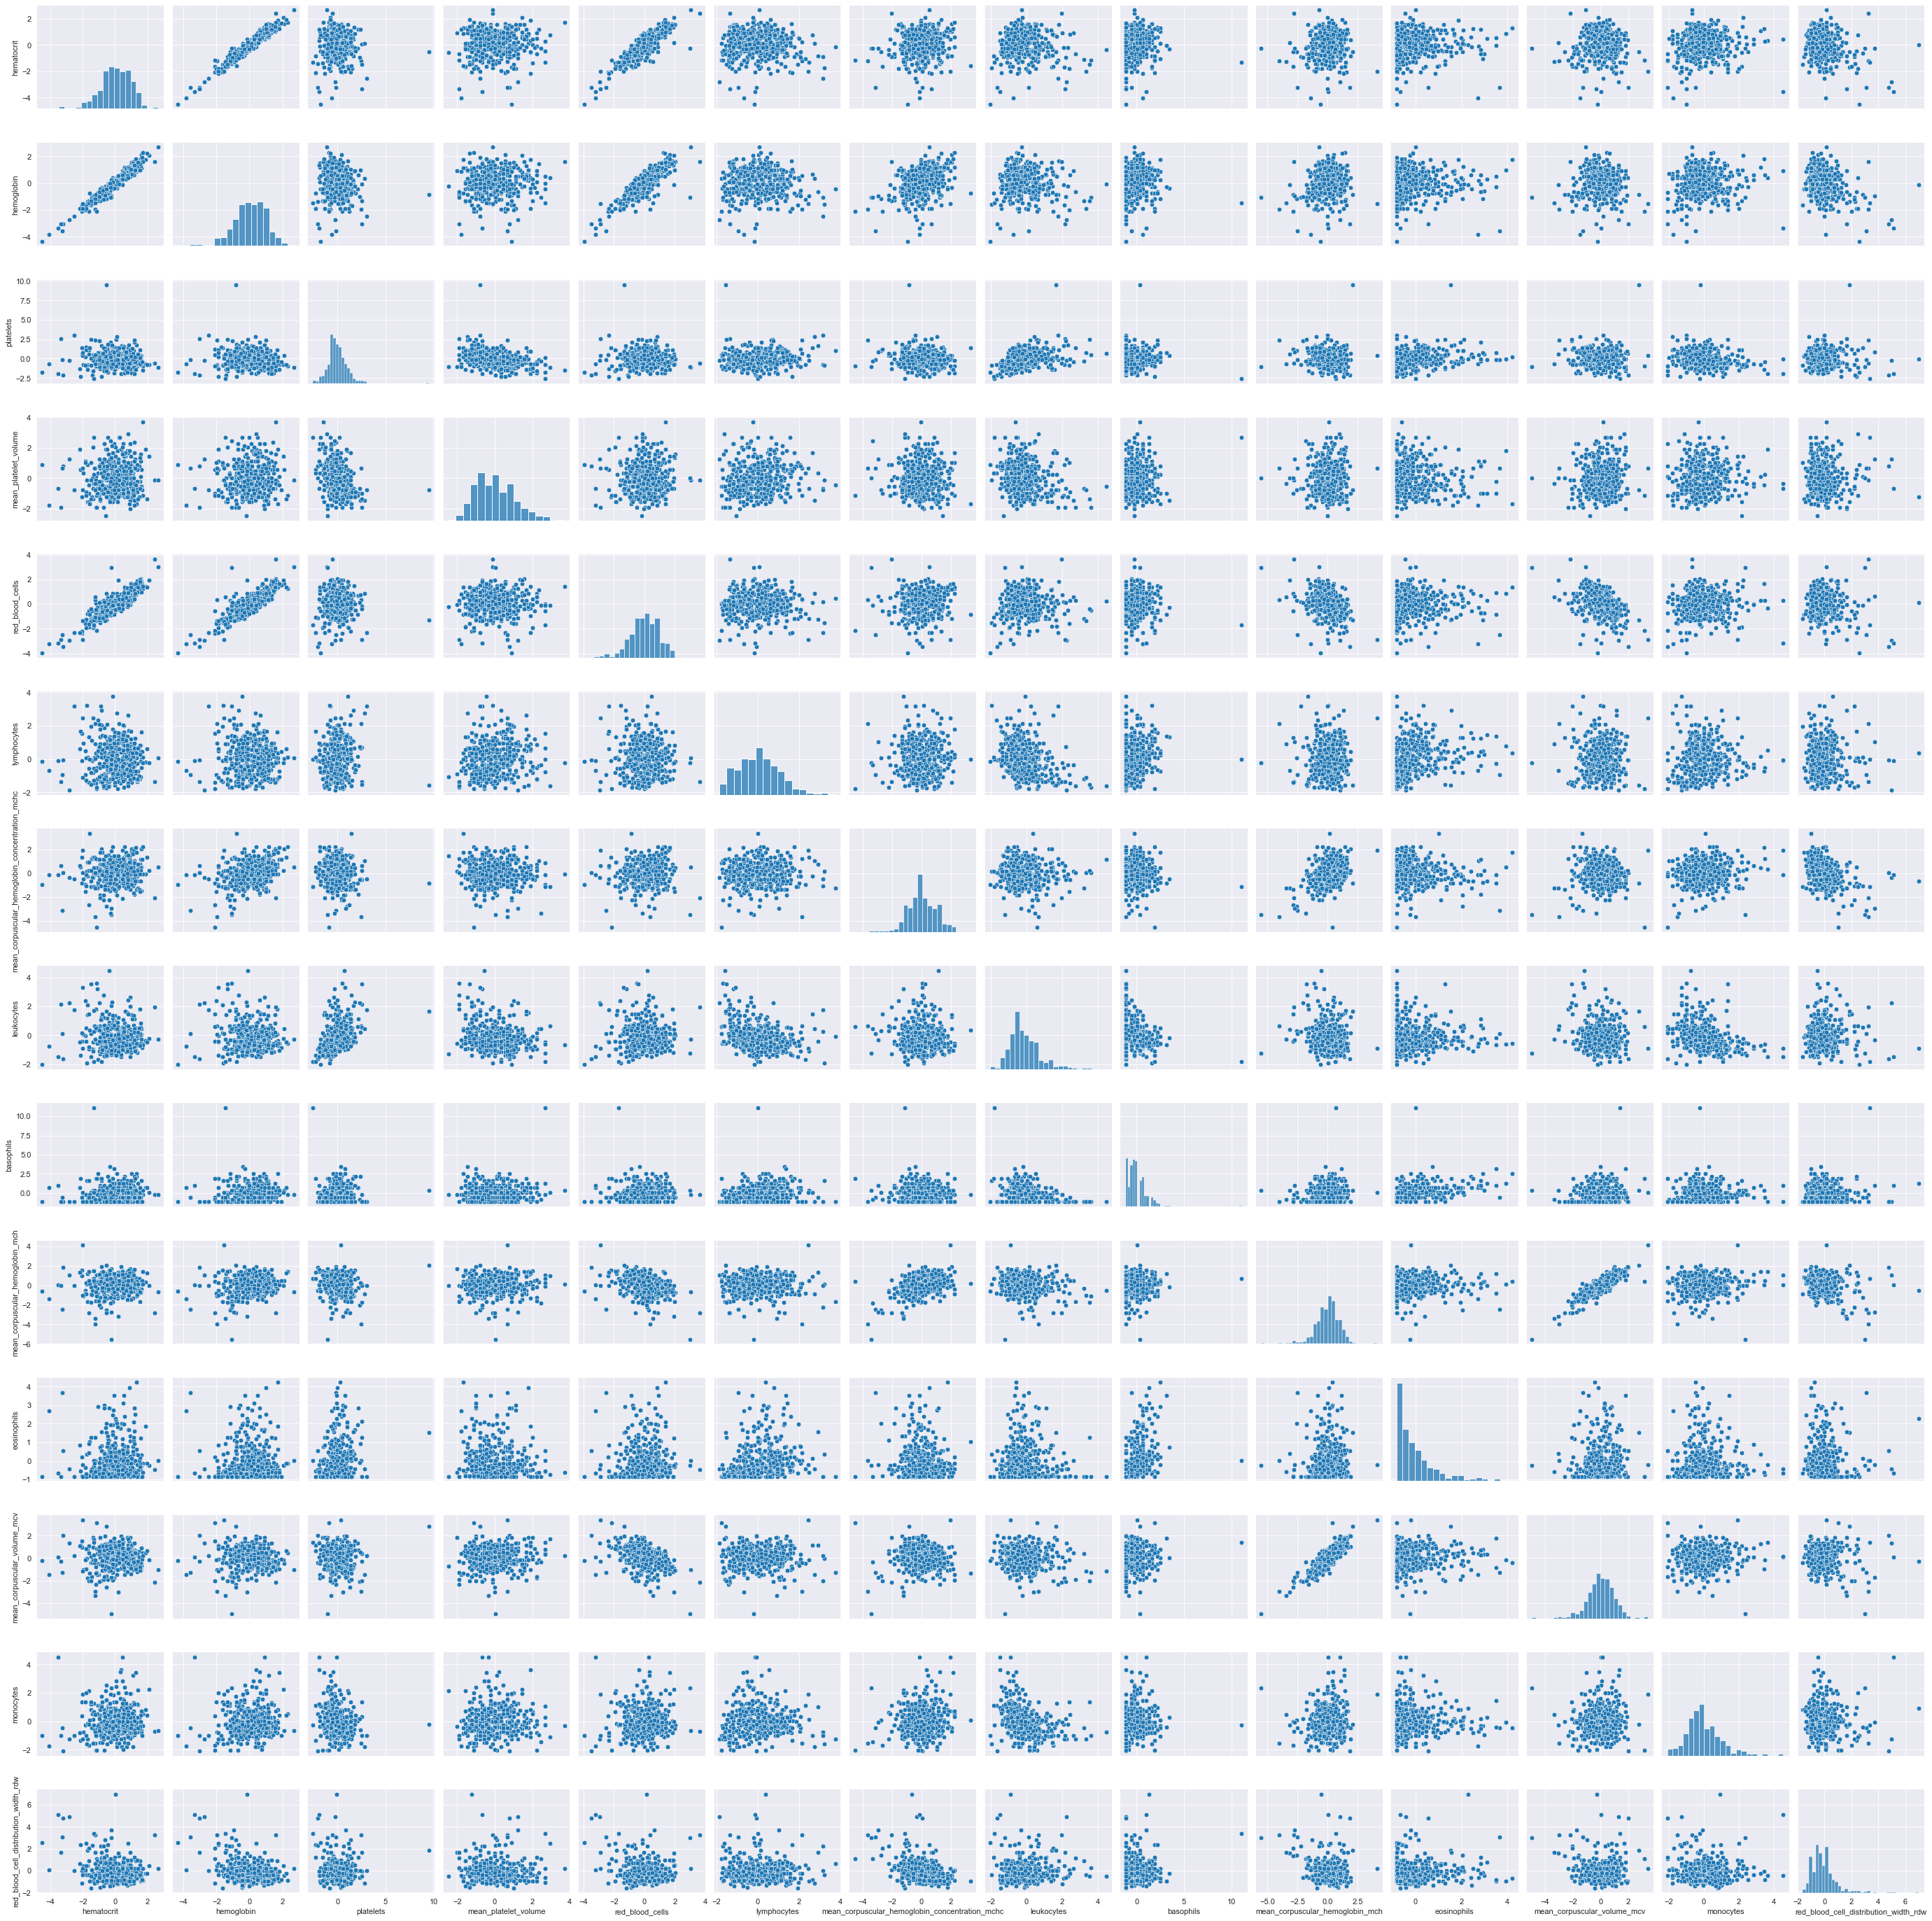

In [20]:
sns.pairplot(df[blood_variables_list])

**We now check the correlation of the blood count variables with the targets:**

- We notice that except some instances, the correlation is very weak
- To increase the correlation, it will be necessary to do some feature engineering

<AxesSubplot:>

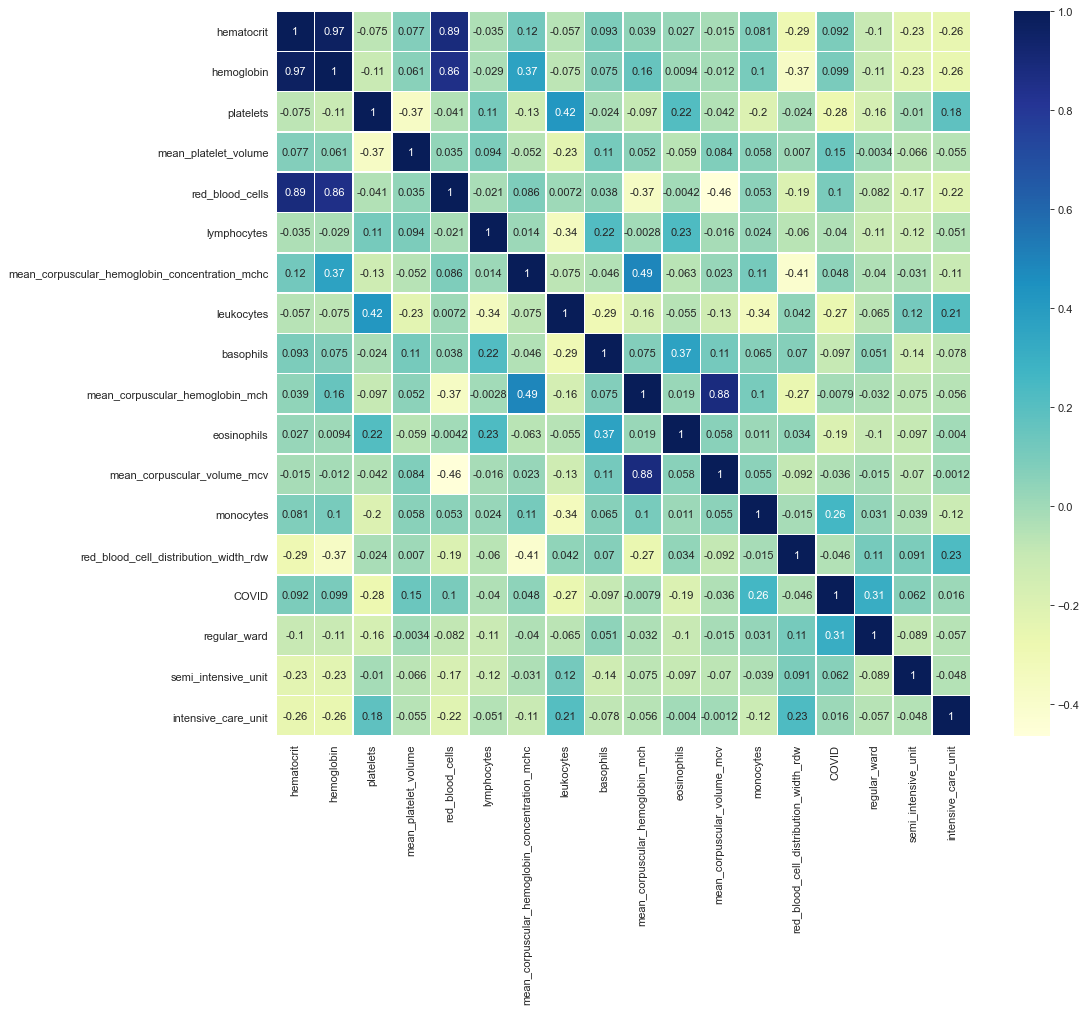

In [22]:
figure(figsize=(14, 12), dpi=80)
sns.heatmap(df[blood_variables_list+['COVID','regular_ward','semi_intensive_unit','intensive_care_unit']].corr(),cmap="YlGnBu",linewidths=.5,annot=True)


### Feature engineering of blood test variables

When looking at the correlation of blood test variables with target variables, **the correlation is usually weak which will lead to weaker predictions in the modelling.** To overcome this, we employ feature engineering. 

We think that the weak correlation can be explained by the fact that the **levels of certain blood measure does not really tell us much in terms of having COVID or hospitalizations if they are in the normal range. What is more important is the fact that they are below or above certain thresholds.** As an example, The normal range for hemoglobin is for men, 13.5 to 17.5 grams per deciliter, for women, 12.0 to 15.5 grams per deciliter [1]. Any level of hemoglobin between these thresholds would not be a concern. However, if the hemoglobin level is below 10 grams/deciliter or above 17.5 grams/deciliter, this would indicate the anomaly in the patient's condition and hence, the patient would be more likely to have COVID or be hospitalized. 

In our data, all blood variables are scaled to the distribution with mean of 0 and variance of 1, so we will not be able to use the actual thresholds used in medical research. Instead, we try to find the optimal threshold by looking at the correlation between the blood test variables with threshold and target variables.

The similar approach was used in Statsenko et al. (2021) [2]

[1] https://www.mayoclinic.org/tests-procedures/hemoglobin-test/about/pac-20385075

[2] https://bmjopen.bmj.com/content/bmjopen/11/2/e044500.full.pdf

### Algorithm to choose the optimal threshold:

**Step 1.** Create two sets of possible threshold levels such that $\theta^{h} \in [\theta^{h}_{0}, \theta^{h}_{1}]$ and $\theta^{l} \in [\theta^{l}_{0}, \theta^{l}_{1}]$ (values to be specified below)

**Step 2.** For each blood feature and for each threshold, create a "low" threshold variable which takes 1 if that blood count feature is *below* $\theta^{l}$, 0 otherwise.

**Step 3.** For each blood feature and for each threshold, create a "high" threshold variable which takes 1 if that blood count feature is *above* $\theta^{h}$, 0 otherwise.

**Step 4.** Calculate the correlation between "low" threshold variable and targets (COVID,regular_ward, semi_intensive_unit, intensive_care_unit) for each threshold and for each blood count feature and choose the threshold with the highest absolute correlation value. 

Since choosing the optimal threshold value depends on the correlation between blood count variable and the target in the train data, this can lead to overfitting. To alleviate this effect, we repeat the algorithm above for random subsets of train data and take the average of the optimal thresholds. 

**Parameters used in the algorithm:**

- $\theta^{h}_{0}=0.4$ , $\theta^{h}_{1}=1.6$,  $\theta^{l}_{0}=-1.6$ , $\theta^{l}_{1}=-0.4$. These values approximately correspond to p-values of 0.35 and 0.05 in the standard normal distribution. 
- Number of simulated samples = 100 
- Size of a random sample = 40 ($\sim$10% of the train set)


In [21]:
threshold=np.arange(-1.6,-0.4,0.1) #setting up the threshold 
target_variables=['COVID','regular_ward','semi_intensive_unit','intensive_care_unit']

low_corr=[] 
high_corr=[]
n_samples=100
#for each target, blood count variable and sample:
aux_low_optimal=np.zeros((len(blood_variables_list),len(target_variables),n_samples)) #the matrix to store the correlation coefficient of optimal "low" threshold variable
aux_high_optimal=np.zeros((len(blood_variables_list),len(target_variables),n_samples)) #the matrix to store the correlation coefficient of optimal "high" threshold variable
low_thrsh_optimal=np.zeros((len(blood_variables_list),len(target_variables),n_samples)) #the matrix to store the optimal "low" threshold
high_thrsh_optimal=np.zeros((len(blood_variables_list),len(target_variables),n_samples)) #the matrix to store the optimal "high" threshold

sum_thrsh_low=np.zeros((len(blood_variables_list),len(target_variables))) #auxiliary matrix to calculate the average of optimal "low" thresholds across samples 
sum_thrsh_high=np.zeros((len(blood_variables_list),len(target_variables))) #auxiliary matrix to calculate the average of optimal "high" thresholds across samples 

for n in range(n_samples): #for each sample
    for v in range(len(target_variables)): #for each target variable
        for i in range(len(blood_variables_list)): #for each blood count variable
            for j in threshold: #for each threshold
                #calculating the correlation between the target and "low" threshold dummy
                low_corr.append(np.corrcoef(df.sample(n=40)[target_variables[v]],df.sample(n=40)[blood_variables_list[i]].apply(lambda x: 1 if x<j else 0))[0,1]) 
                #calculating the correlation between the target and "high" threshold dummy
                high_corr.append(np.corrcoef(df.sample(n=40)[target_variables[v]],df.sample(n=40)[blood_variables_list[i]].apply(lambda x: 1 if x>abs(j) else 0))[0,1])
                aux_low=low_corr[0]
                aux_high=high_corr[0]
                if abs(aux_low)>=aux_low_optimal[i,v,n]: #if the correlation improves: 
                    aux_low_optimal[i,v,n]=aux_low #storing the correlation coefficient associated with "low" threshold
                    low_thrsh_optimal[i,v,n]=j #storing the current "low" threshold
                    
                if abs(aux_high)>=aux_high_optimal[i,v,n]: #repeating the same for "high" threshold
                    aux_high_optimal[i,v,n]=aux_high
                    high_thrsh_optimal[i,v,n]=abs(j)
                low_corr=[] #resetting
                high_corr=[]
    sum_thrsh_low=sum_thrsh_low+low_thrsh_optimal[:,:,n] 
    sum_thrsh_high=sum_thrsh_high+high_thrsh_optimal[:,:,n]    
    avg_thrsh_low=sum_thrsh_low/(n+1) #calculate the average of optimal "low" thresholds across samples
    avg_thrsh_high=sum_thrsh_high/(n+1) #calculate the average of optimal "high" thresholds across samples
    
np.seterr(divide='ignore', invalid='ignore')

C:\Users\AGarashzade\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\AGarashzade\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

**Now we have optimal thresholds calculated as the average of optimal sample thresholds. For these thresholds we calculate the associated correlation coefficient for each target variable:**

In [22]:
avg_low_corr=np.zeros((len(blood_variables_list),len(target_variables)))
avg_high_corr=np.zeros((len(blood_variables_list),len(target_variables)))

for v in range(len(target_variables)):
    for i in range(len(blood_variables_list)): 
        avg_low_corr[i,v]=np.corrcoef(df[target_variables[v]],
                                      df[blood_variables_list[i]].apply(lambda x: 1 if x<avg_thrsh_low[i,v] else 0))[0,1]
        avg_high_corr[i,v]=np.corrcoef(df[target_variables[v]],
                                      df[blood_variables_list[i]].apply(lambda x: 1 if x>avg_thrsh_high[i,v] else 0))[0,1]        

**We store the optimal "low" and "high" thresholds and correlation coefficients associated with them into the seperate dfs:**

In [23]:
Low_thrsh_optimal_corr=pd.DataFrame(data=avg_low_corr,index=blood_variables_list,columns=target_variables)
Low_thrsh_optimal=pd.DataFrame(data=np.round(avg_thrsh_low,decimals=2),index=blood_variables_list,columns=target_variables)

High_thrsh_optimal_corr=pd.DataFrame(data=avg_high_corr,index=blood_variables_list,columns=target_variables)
High_thrsh_optimal=pd.DataFrame(data=np.round(avg_thrsh_high,decimals=2),index=blood_variables_list,columns=target_variables)

**Example:**

In [24]:
Low_thrsh_optimal

,COVID,regular_ward,semi_intensive_unit,intensive_care_unit
hematocrit,-0.92,-0.95,-0.98,-0.83
hemoglobin,-0.86,-0.91,-0.90,-0.91
platelets,-0.88,-0.94,-0.94,-0.86
mean_platelet_volume,-0.87,-0.95,-0.94,-0.86
red_blood_cells,-0.93,-0.98,-0.99,-0.92
lymphocytes,-0.89,-0.88,-0.97,-0.83
mean_corpuscular_hemoglobin_concentration_mchc,-0.78,-0.91,-0.94,-0.90
leukocytes,-0.88,-0.84,-0.84,-0.79
basophils,-0.64,-0.65,-0.72,-0.70
mean_corpuscular_hemoglobin_mch,-1.00,-0.88,-0.90,-0.86


**Below we join 4 dataframes into 1 and rename the columns:**

In [25]:
df_blood_variables=Low_thrsh_optimal.join(Low_thrsh_optimal_corr,on=Low_thrsh_optimal.index,lsuffix='_thrsh_low',rsuffix='_corr_low')

In [26]:
df_blood_variables=df_blood_variables.join(High_thrsh_optimal, on=df_blood_variables.index)


In [27]:
df_blood_variables.rename(columns={'COVID': 'COVID_thrsh_high','regular_ward': 'regular_ward_thrsh_high',
                           'semi_intensive_unit': 'semi_intensive_unit_thrsh_high',
                        'intensive_care_unit': 'intensive_care_unit_thrsh_high'},inplace=True)

In [28]:
df_blood_variables=df_blood_variables.join(High_thrsh_optimal_corr, on=df_blood_variables.index)

df_blood_variables.rename(columns={'COVID': 'COVID_corr_high','regular_ward': 'regular_ward_corr_high',
                           'semi_intensive_unit': 'semi_intensive_unit_corr_high',
                        'intensive_care_unit': 'intensive_care_unit_corr_high'},inplace=True)

In [29]:
df_blood_variables.head() 

,COVID_thrsh_low,regular_ward_thrsh_low,semi_intensive_unit_thrsh_low,intensive_care_unit_thrsh_low,COVID_corr_low,regular_ward_corr_low,semi_intensive_unit_corr_low,intensive_care_unit_corr_low,COVID_thrsh_high,regular_ward_thrsh_high,semi_intensive_unit_thrsh_high,intensive_care_unit_thrsh_high,COVID_corr_high,regular_ward_corr_high,semi_intensive_unit_corr_high,intensive_care_unit_corr_high
hematocrit,-0.92,-0.95,-0.98,-0.83,-0.077958,0.111433,0.244349,0.302297,0.95,0.94,0.93,0.84,0.055864,0.022985,-0.076148,-0.090988
hemoglobin,-0.86,-0.91,-0.90,-0.91,-0.068899,0.105196,0.194010,0.261014,0.92,0.92,0.92,0.91,0.051785,0.037937,-0.070666,-0.083537
platelets,-0.88,-0.94,-0.94,-0.86,0.291556,0.180517,0.029383,-0.035978,0.87,0.93,0.90,0.88,-0.170632,-0.040242,0.019008,0.087312
mean_platelet_volume,-0.87,-0.95,-0.94,-0.86,-0.172851,-0.034366,0.111185,0.014750,0.94,0.84,0.90,0.89,0.039337,-0.076631,0.037467,-0.012739
red_blood_cells,-0.93,-0.98,-0.99,-0.92,-0.082412,0.084210,0.141369,0.216654,0.87,1.01,0.85,0.85,0.116897,0.046764,-0.080161,-0.083537


**We also add the correlation between the original blood count variable and the target:**

In [30]:
COVID_corr=[np.corrcoef(df['COVID'],df[blood_variables_list[i]])[0,1] for i in range(len(blood_variables_list))]
regular_ward_corr=[np.corrcoef(df['regular_ward'],df[blood_variables_list[i]])[0,1] for i in range(len(blood_variables_list))]
semi_intensive_corr=[np.corrcoef(df['semi_intensive_unit'],df[blood_variables_list[i]])[0,1] for i in range(len(blood_variables_list))]
intensive_corr=[np.corrcoef(df['intensive_care_unit'],df[blood_variables_list[i]])[0,1] for i in range(len(blood_variables_list))]

In [31]:
original_corrs=pd.DataFrame(zip(COVID_corr,regular_ward_corr,semi_intensive_corr,intensive_corr),index=blood_variables_list, 
             columns=['COVID_corr','regular_ward_corr','semi_intensive_corr','intensive_corr'])

In [32]:
df_blood_variables=df_blood_variables.join(original_corrs, on=df_blood_variables.index)

### Which type of variable should we choose to use in the model? 

We have three potential candidates to choose as a variable for each blood count variable and the target: 

- **"Low" threshold variable:** takes 1 if the blood count variable is below the optimal "low" threshold
- **"High" threshold variable:** takes 1 if the blood count variable is above the optimal "high" threshold
- **Original blood count variable**


In [33]:
#Calculating the maximum correlation for each target and blood count variable the maximum correlation between three 

df_blood_variables['COVID_max_corr']=abs(df_blood_variables[['COVID_corr','COVID_corr_high','COVID_corr_low']]).max(axis=1)
df_blood_variables['regular_ward_max_corr']=abs(df_blood_variables[['regular_ward_corr','regular_ward_corr_high','regular_ward_corr_low']]).max(axis=1)
df_blood_variables['semi_intensive_max_corr']=abs(df_blood_variables[['semi_intensive_corr','semi_intensive_unit_corr_high','semi_intensive_unit_corr_low']]).max(axis=1)
df_blood_variables['intensive_max_corr']=abs(df_blood_variables[['intensive_corr','intensive_care_unit_corr_high','intensive_care_unit_corr_low']]).max(axis=1)


In [34]:
#Absolute value of the correlation for original blood count variable
df_blood_variables['COVID_corr_abs']=abs(df_blood_variables['COVID_corr'])
df_blood_variables['regular_ward_corr_abs']=abs(df_blood_variables['regular_ward_corr'])
df_blood_variables['semi_intensive_corr_abs']=abs(df_blood_variables['semi_intensive_corr'])
df_blood_variables['intensive_corr_abs']=abs(df_blood_variables['intensive_corr'])


Text(0, 0.5, 'Magnititude of Correlation')

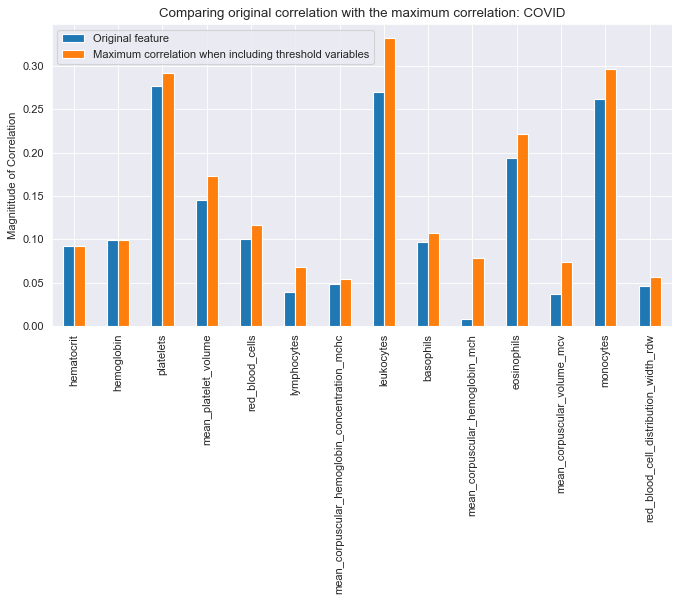

In [35]:
#plotting
df_blood_variables.plot(y=['COVID_corr_abs','COVID_max_corr'],kind='bar',figsize=(10,5),use_index=True,label=['Original feature','Maximum correlation when including threshold variables'])
plt.title('Comparing original correlation with the maximum correlation: COVID')
plt.ylabel('Magnititude of Correlation')

**We compare the original correlation with maximum correlation for other targets:**

(0.0, 0.25)

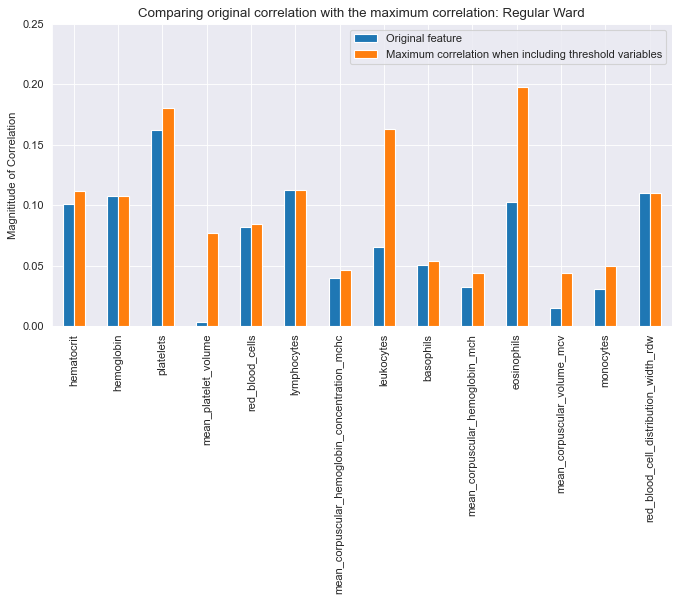

In [36]:
#Regular ward
df_blood_variables.plot(y=['regular_ward_corr_abs','regular_ward_max_corr'],kind='bar',figsize=(10,5),use_index=True,label=['Original feature','Maximum correlation when including threshold variables'])
plt.title('Comparing original correlation with the maximum correlation: Regular Ward')
plt.ylabel('Magnititude of Correlation')
plt.ylim([0,0.25])

Text(0, 0.5, 'Magnititude of Correlation')

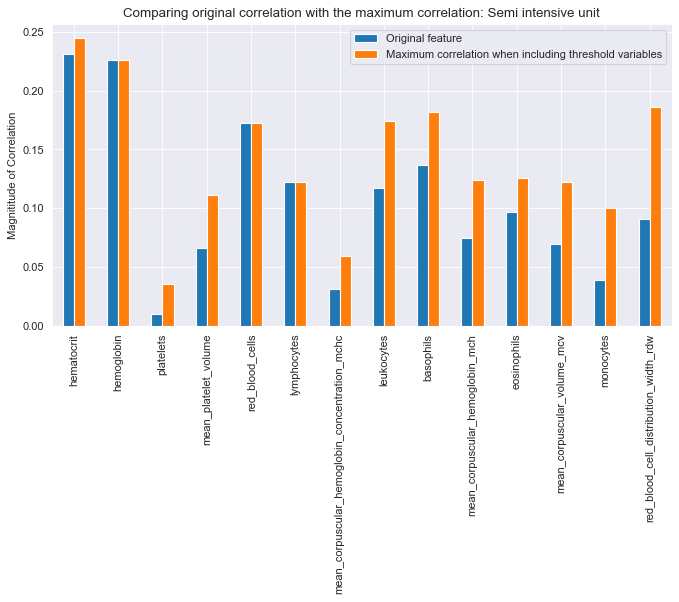

In [39]:
#Semi intensive unit 
df_blood_variables.plot(y=['semi_intensive_corr_abs','semi_intensive_max_corr'],kind='bar',figsize=(10,5),use_index=True,label=['Original feature','Maximum correlation when including threshold variables'])
plt.title('Comparing original correlation with the maximum correlation: Semi intensive unit')
plt.ylabel('Magnititude of Correlation')

Text(0, 0.5, 'Magnititude of Correlation')

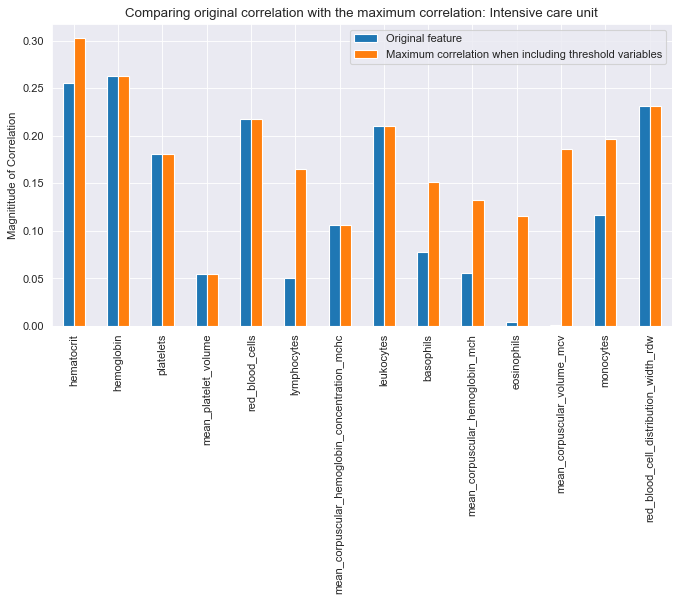

In [37]:
#Intensive care unit 
df_blood_variables.plot(y=['intensive_corr_abs','intensive_max_corr'],kind='bar',figsize=(10,5),use_index=True,label=['Original feature','Maximum correlation when including threshold variables'])
plt.title('Comparing original correlation with the maximum correlation: Intensive care unit')
plt.ylabel('Magnititude of Correlation')

***Conclusion***: Threshold variables improves the correlation with target variables in many cases, so we will use them in the modelling.

One thing to notice is that optimal threshold can change depending on which target variable we are looking at. This is why, we will need to use different set of blood variables for each target variable prediction. 

**By comparing the magnitude of the correlation between original variable, "low" threshold variable and "high" threshold variable, we choose the optimal blood count variable for each target:**

We want to be conservative in our selection and we choose the threshold variables over original one only one the correlation is improved more than 0.05 in absolute value.

In [38]:
df_blood_variables['Optimal_feature_COVID']=""
df_blood_variables['Optimal_feature_regular']=""
df_blood_variables['Optimal_feature_semi_intensive']=""
df_blood_variables['Optimal_feature_intensive']=""

for i in range(len(df_blood_variables)):
    #Optimal features for COVID
    if df_blood_variables['COVID_max_corr'][i]==abs(df_blood_variables['COVID_corr_high'])[i] and abs(df_blood_variables['COVID_corr_high'])[i]-df_blood_variables['COVID_corr_abs'][i]>0.05:
        df_blood_variables['Optimal_feature_COVID'][i]='Dummy(x>'+str(df_blood_variables['COVID_thrsh_high'][i])+')'       

    elif df_blood_variables['COVID_max_corr'][i]==abs(df_blood_variables['COVID_corr_low'])[i] and abs(df_blood_variables['COVID_corr_low'])[i]-df_blood_variables['COVID_corr_abs'][i]>0.05:
        df_blood_variables['Optimal_feature_COVID'][i]='Dummy(x<'+str(df_blood_variables['COVID_thrsh_low'][i])+')' 
    else:
        df_blood_variables['Optimal_feature_COVID'][i]='Original variable'    
    
    #Optimal features for regular ward
    if df_blood_variables['regular_ward_max_corr'][i]==abs(df_blood_variables['regular_ward_corr_high'])[i] and abs(df_blood_variables['regular_ward_corr_high'])[i]-df_blood_variables['regular_ward_corr_abs'][i]>0.05:
        df_blood_variables['Optimal_feature_regular'][i]='Dummy(x>'+str(df_blood_variables['regular_ward_thrsh_high'][i])+')'       

    elif df_blood_variables['regular_ward_max_corr'][i]==abs(df_blood_variables['regular_ward_corr_low'])[i] and abs(df_blood_variables['regular_ward_corr_low'])[i]-df_blood_variables['regular_ward_corr_abs'][i]>0.05:
        df_blood_variables['Optimal_feature_regular'][i]='Dummy(x<'+str(df_blood_variables['regular_ward_thrsh_low'][i])+')' 
    else:
        df_blood_variables['Optimal_feature_regular'][i]='Original variable'       
    
    #Optimal features for semi intensive
    if df_blood_variables['semi_intensive_max_corr'][i]==abs(df_blood_variables['semi_intensive_unit_corr_high'])[i] and abs(df_blood_variables['semi_intensive_unit_corr_high'])[i]-df_blood_variables['semi_intensive_corr_abs'][i]>0.05:
        df_blood_variables['Optimal_feature_semi_intensive'][i]='Dummy(x>'+str(df_blood_variables['semi_intensive_unit_thrsh_high'][i])+')'       

    elif df_blood_variables['semi_intensive_max_corr'][i]==abs(df_blood_variables['semi_intensive_unit_corr_low'])[i] and abs(df_blood_variables['semi_intensive_unit_corr_low'])[i]-df_blood_variables['semi_intensive_corr_abs'][i]>0.05:
        df_blood_variables['Optimal_feature_semi_intensive'][i]='Dummy(x<'+str(df_blood_variables['semi_intensive_unit_thrsh_low'][i])+')' 
    else:
        df_blood_variables['Optimal_feature_semi_intensive'][i]='Original variable'       
    
    #Optimal features for intensive care
    if df_blood_variables['intensive_max_corr'][i]==abs(df_blood_variables['intensive_care_unit_corr_high'])[i] and abs(df_blood_variables['intensive_care_unit_corr_high'])[i]-df_blood_variables['intensive_corr_abs'][i]>0.05:
        df_blood_variables['Optimal_feature_intensive'][i]='Dummy(x>'+str(df_blood_variables['intensive_care_unit_thrsh_high'][i])+')'       

    elif df_blood_variables['intensive_max_corr'][i]==abs(df_blood_variables['intensive_care_unit_corr_low'])[i] and abs(df_blood_variables['intensive_care_unit_corr_low'])[i]-df_blood_variables['intensive_corr_abs'][i]>0.05:
        df_blood_variables['Optimal_feature_intensive'][i]='Dummy(x<'+str(df_blood_variables['intensive_care_unit_thrsh_low'][i])+')' 
    else:
        df_blood_variables['Optimal_feature_intensive'][i]='Original variable'       
    


        

<ipython-input-38-a23e5bca805d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_blood_variables['Optimal_feature_COVID'][i]='Original variable'
<ipython-input-38-a23e5bca805d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_blood_variables['Optimal_feature_regular'][i]='Original variable'
<ipython-input-38-a23e5bca805d>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_blood_variables['Optimal_feature_semi_intensive'][i]='

#### Optimal variables list:

In [39]:
df_blood_variables[['Optimal_feature_COVID','Optimal_feature_regular','Optimal_feature_semi_intensive','Optimal_feature_intensive']]

,Optimal_feature_COVID,Optimal_feature_regular,Optimal_feature_semi_intensive,Optimal_feature_intensive
hematocrit,Original variable,Original variable,Original variable,Original variable
hemoglobin,Original variable,Original variable,Original variable,Original variable
platelets,Original variable,Original variable,Original variable,Original variable
mean_platelet_volume,Original variable,Dummy(x>0.84),Original variable,Original variable
red_blood_cells,Original variable,Original variable,Original variable,Original variable
lymphocytes,Original variable,Original variable,Original variable,Dummy(x<-0.83)
mean_corpuscular_hemoglobin_concentration_mchc,Original variable,Original variable,Original variable,Original variable
leukocytes,Dummy(x<-0.88),Dummy(x<-0.84),Dummy(x>0.96),Original variable
basophils,Original variable,Original variable,Original variable,Dummy(x<-0.7)
mean_corpuscular_hemoglobin_mch,Dummy(x>0.88),Original variable,Original variable,Dummy(x<-0.86)


**We add the optimal blood count variables to the dataframe:**

In [40]:
target_suffix=['_COVID','_regular','_semi_intensive','_intensive']

for v in target_suffix:
    for i in blood_variables_list:
        if df_blood_variables['Optimal_feature'+v][i]=='Original variable':
            df[i+v]=df[i]
        else:
            df[i+v]=df[i].apply(lambda x: 1 if eval(df_blood_variables['Optimal_feature'+v][i][6:-1]) else 0)
            

## 5. Modelling

Since we have small and imbalanced train set, we will try to use simple models to avoid overfitting. For each of the targets, we use three models: 

- **Logistic Regression:** baseline model
- **SVM with Grid Search:** we choose SVM because it performs well with the small datasets
- **SVM with PCA and Grid Search:** we saw earlier in the descriptive analysis that some blood count variables are highly correlated with each other. When this is the case, PCA can help to increase the model performance

We avoid using any tree-based model since non-parametrical models in a small dataset tend to lead to severe overfitting.

Since the data is imbalanced, accuracy is the poor measure of model performance. Instead, we will use Area Under Curve (AUC) as the main performance metric. We will also put an emphasis to minimizing false negatives because predicting falsely that the patient do not have COVID (or do not have to be hospitalized) when s/he actually does is very costly and needs to be avoided. 


**Below we create data frames to save the key metrics of the models:**
 
- **F1 score:** which is defined to be 2 * (precision * recall) / (precision + recall). In highly imbalanced datasets, where the accuracy is poor measure of model performance, F1 score can be used alternatively. It is increasing in precision and recall, meaning that higher F1 score, the better the model performs. 
- **AUC score:** which is calculated as area under ROC curve. The bigger the area, for each probability threshold, the model have higher TP rate and lower FP rate. 

We will also compare these two metrics between train and test results to check if there is overfitting.

In [194]:
AUC_score_train = np.zeros((3,4))
AUC_score_test = np.zeros((3,4))

F1_score_train = np.zeros((3,4))
F1_score_test = np.zeros((3,4))


AUC_score_train_results = pd.DataFrame(data=AUC_score_train, 
                                       index=['Logistic Regression','SVM with Grid','SVM with Grid + PCA'],
                                      columns=['COVID','Regular ward','Semi intensive unit','Intensive care unit'])

AUC_score_test_results = pd.DataFrame(data=AUC_score_test, 
                                       index=['Logistic Regression','SVM with Grid','SVM with Grid + PCA'],
                                      columns=['COVID','Regular ward','Semi intensive unit','Intensive care unit'])

F1_score_train_results = pd.DataFrame(data=F1_score_train, 
                                       index=['Logistic Regression','SVM with Grid','SVM with Grid + PCA'],
                                      columns=['COVID','Regular ward','Semi intensive unit','Intensive care unit'])

F1_score_test_results = pd.DataFrame(data=F1_score_test, 
                                       index=['Logistic Regression','SVM with Grid','SVM with Grid + PCA'],
                                      columns=['COVID','Regular ward','Semi intensive unit','Intensive care unit'])

### 5.1. COVID

In [41]:
#We start by choosing the columns for COVID model; we choose the optimal blood count variables that we have determined 
#before for COVID
df_COVID=df[['patient_age_quantile','hematocrit_COVID',
       'hemoglobin_COVID', 'platelets_COVID', 'mean_platelet_volume_COVID', 'red_blood_cells_COVID',
       'lymphocytes_COVID', 'mean_corpuscular_hemoglobin_concentration_mchc_COVID',
       'leukocytes_COVID', 'basophils_COVID', 'mean_corpuscular_hemoglobin_mch_COVID',
       'eosinophils_COVID', 'mean_corpuscular_volume_mcv_COVID', 'monocytes_COVID',
       'red_blood_cell_distribution_width_rdw_COVID','Nulls','Nulls_influenza_a','COVID']]

In [42]:
#Train-test split, we determine test size to be 30%
from sklearn.model_selection import train_test_split

X_train_COVID, X_test_COVID, y_train_COVID, y_test_COVID = train_test_split(df_COVID.drop(['COVID'],axis=1),
                                                    df_COVID['COVID'], test_size=0.30, 
                                                  random_state=101)


### 5.1.1. Logistic Regression:

In order to minimize the false negatives, we choose to use balanced weight, which gives weights inversely proportion to the frequency in the data. 

In [195]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(class_weight='balanced',max_iter=1000)
logmodel.fit(X_train_COVID,y_train_COVID)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [196]:
predictions_COVID = logmodel.predict(X_test_COVID) 
predictions_train_COVID = logmodel.predict(X_train_COVID)

**We check the confusion matrix:**

The model is trying to predict as much as 1's possible since we have chosen the class weight to be balanced. This is why, we avoided False Negatives (FN) at the cost of increasing False Positivies (FP)

In [197]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_COVID, predictions_COVID)

array([[84, 18],
       [10, 10]], dtype=int64)

**F1-score of the logistic regression is 0.42. Note that without giving balanced weights to the classes, the model would have F1-score of 0.36. This is not suprising considering the fact that we have very imbalanced data. We will assess the result further in comparision with the other models:**

In [198]:
from sklearn.metrics import classification_report
print(classification_report(y_test_COVID,predictions_COVID)) 

              precision    recall  f1-score   support

           0       0.89      0.82      0.86       102
           1       0.36      0.50      0.42        20

    accuracy                           0.77       122
   macro avg       0.63      0.66      0.64       122
weighted avg       0.81      0.77      0.78       122



In [204]:
#storing the results for F1 score
from sklearn.metrics import f1_score

F1_score_train_results['COVID']['Logistic Regression'] = f1_score(y_train_COVID, predictions_train_COVID)
F1_score_test_results['COVID']['Logistic Regression'] = f1_score(y_test_COVID, predictions_COVID)

**Now we look at the ROC curve and calculate the AUC score of the model. We compare the results in train and test set to check if there was overfitting:**

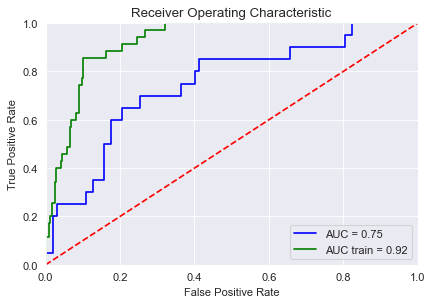

In [205]:
from sklearn import metrics
# calculate the fpr and tpr for all thresholds of the classification
probs_train = logmodel.predict_proba(X_train_COVID)
preds_train = probs_train[:,1]

probs = logmodel.predict_proba(X_test_COVID)
preds = probs[:,1]

fpr_train, tpr_train, threshold = metrics.roc_curve(y_train_COVID, preds_train)
fpr, tpr, threshold = metrics.roc_curve(y_test_COVID, preds)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

AUC_score_train_results['COVID']['Logistic Regression'] = roc_auc_train
AUC_score_test_results['COVID']['Logistic Regression'] = roc_auc


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_train, tpr_train, 'g', label = 'AUC train = %0.2f' % roc_auc_train)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


**Conclusion:** We see slight overfitting of the model when we compare the train and test AUC, however the Linear Regression performs relatively well. 

### 5.1.2. SVM with Grid Search:

We use SVM combining with hyperparameter tuning in two dimensions: 

- **C:** We can think C as our total "budget" for allowing the points to be in wrong side of the seperating hyperplane or its margin. Higher the C, the model will have higher bias but lower variance. 

We again use option of balanced class weight, linear kernel and use AUC score as the scoring criteria of hyperparameter tuning.

In [207]:
from sklearn import svm

In [208]:
from sklearn.model_selection import GridSearchCV

# Defining parameter range to grid search
C = [0.01,0.1,1,10,100]
param_gridSVM = {'C': C }
                
# Define grid instance
gridSVM = GridSearchCV(cv=5, estimator=svm.SVC(class_weight='balanced',kernel='linear',random_state=101,probability=True), param_grid=param_gridSVM, scoring='roc_auc') 

# Initialize grid search, fitting the best model
gridSVM.fit(X_train_COVID, y_train_COVID)

GridSearchCV(cv=5,
             estimator=SVC(class_weight='balanced', kernel='linear',
                           probability=True, random_state=101),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='roc_auc')

#### Best parameters of the grid search:

In [209]:
gridSVM.best_params_

{'C': 0.1}

In [210]:
predictions_COVID_SVM = gridSVM.predict(X_test_COVID)
predictions_train_COVID_SVM = gridSVM.predict(X_train_COVID)

**The model performs slightly worse than Logistic Regression in terms of F1-score and AUC score:**

In [211]:
print(classification_report(y_test_COVID,predictions_COVID_SVM))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85       102
           1       0.37      0.65      0.47        20

    accuracy                           0.76       122
   macro avg       0.65      0.72      0.66       122
weighted avg       0.83      0.76      0.79       122



In [212]:
#storing the results for SVM with Grid Search
F1_score_train_results['COVID']['SVM with Grid'] = f1_score(y_train_COVID, predictions_train_COVID_SVM)
F1_score_test_results['COVID']['SVM with Grid'] = f1_score(y_test_COVID, predictions_COVID_SVM)

**Confusion matrix:** 

In [97]:
confusion_matrix(y_test_COVID,predictions_COVID_SVM)

array([[80, 22],
       [ 7, 13]], dtype=int64)

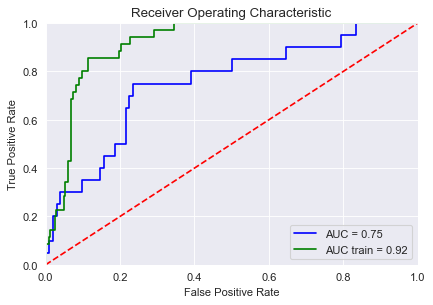

In [213]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs_train = gridSVM.predict_proba(X_train_COVID)
preds_train = probs_train[:,1]

probs = gridSVM.predict_proba(X_test_COVID)
preds = probs[:,1]

fpr_train, tpr_train, threshold = metrics.roc_curve(y_train_COVID, preds_train)
fpr, tpr, threshold = metrics.roc_curve(y_test_COVID, preds)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

AUC_score_train_results['COVID']['SVM with Grid'] = roc_auc_train
AUC_score_test_results['COVID']['SVM with Grid'] = roc_auc

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_train, tpr_train, 'g', label = 'AUC train = %0.2f' % roc_auc_train)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### 5.1.3. SVM with Grid Search and PCA:

As a final effort, we add PCA as a part of tuning. In principle, PCA should not affect the model performance however, we know that there are some blood count variables in our feature set that are very correlated. In these cases, PCA sometimes can lead to an increase in model performance in practice.

In [214]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler #since we use PCA, we need to scale the data

#We need scale the features since we will use PCA: 
pca = PCA()
scaler = StandardScaler()
model = svm.SVC(probability=True,class_weight='balanced',kernel='linear')
pipe = Pipeline(steps=[("scaler",scaler),("pca",pca),("svm",model)])

param_grid= {
    "pca__n_components": [5,7,8,9,10,11,12,13,15,17],
    "svm__C": [0.01,0.1,1,10],
    "svm__kernel": ['linear']

}

search = GridSearchCV(pipe,param_grid,n_jobs=2)
search.fit(X_train_COVID,y_train_COVID)

print(search.best_params_)

{'pca__n_components': 10, 'svm__C': 0.01, 'svm__kernel': 'linear'}


In [215]:
predictions_COVID_SVM_PCA = search.predict(X_test_COVID)
predictions_train_COVID_SVM_PCA = search.predict(X_train_COVID)

In [216]:
print(classification_report(y_test_COVID,predictions_COVID_SVM_PCA))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       102
           1       0.42      0.55      0.48        20

    accuracy                           0.80       122
   macro avg       0.66      0.70      0.68       122
weighted avg       0.83      0.80      0.81       122



In [217]:
#storing the results for SVM with Grid Search + PCA 
F1_score_train_results['COVID']['SVM with Grid + PCA'] = f1_score(y_train_COVID, predictions_train_COVID_SVM_PCA)
F1_score_test_results['COVID']['SVM with Grid + PCA'] = f1_score(y_test_COVID, predictions_COVID_SVM_PCA)

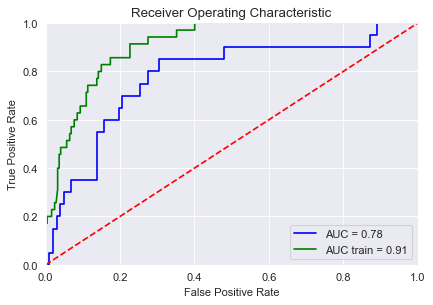

In [220]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs_train = search.predict_proba(X_train_COVID)
preds_train = probs_train[:,1]

probs = search.predict_proba(X_test_COVID)
preds = probs[:,1]

fpr_train, tpr_train, threshold = metrics.roc_curve(y_train_COVID, preds_train)
fpr, tpr, threshold = metrics.roc_curve(y_test_COVID, preds)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

AUC_score_train_results['COVID']['SVM with Grid + PCA'] = roc_auc_train
AUC_score_test_results['COVID']['SVM with Grid + PCA'] = roc_auc

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_train, tpr_train, 'g', label = 'AUC train = %0.2f' % roc_auc_train)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Conclusion:** SVM with PCA has improved the model and confirms our expectation. We use 3 models in similar fashion for the prediction of other 3 targets below. 

### 5.2. Regular Ward

In [221]:
#Now we get the optimal features for regular ward
df_regular=df[['patient_age_quantile','hematocrit_regular',
       'hemoglobin_regular', 'platelets_regular', 'mean_platelet_volume_regular', 'red_blood_cells_regular',
       'lymphocytes_regular', 'mean_corpuscular_hemoglobin_concentration_mchc_regular',
       'leukocytes_regular', 'basophils_regular', 'mean_corpuscular_hemoglobin_mch_regular',
       'eosinophils_regular', 'mean_corpuscular_volume_mcv_regular', 'monocytes_regular',
       'red_blood_cell_distribution_width_rdw_regular','Nulls','Nulls_influenza_a','regular_ward']]

In [222]:
#we split the data between train and test
X_train_regular, X_test_regular, y_train_regular, y_test_regular = train_test_split(df_regular.drop(['regular_ward'],axis=1),
                                                   df_regular['regular_ward'], test_size=0.30, random_state=101)


### 5.2.1. Logistic Regression 

In [223]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(X_train_regular,y_train_regular)

LogisticRegression(class_weight='balanced')

In [224]:
predictions_regular = logmodel.predict(X_test_regular)
predictions_train_regular = logmodel.predict(X_train_regular)

In [225]:
print(classification_report(y_test_regular,predictions_regular))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82       110
           1       0.23      0.75      0.35        12

    accuracy                           0.72       122
   macro avg       0.59      0.73      0.58       122
weighted avg       0.89      0.72      0.78       122



In [226]:
#storing the results for Logistic Regression
F1_score_train_results['Regular ward']['Logistic Regression'] = f1_score(y_train_regular, predictions_train_regular)
F1_score_test_results['Regular ward']['Logistic Regression'] = f1_score(y_test_regular, predictions_regular)


In [118]:
confusion_matrix(y_test_regular,predictions_regular) 

array([[79, 31],
       [ 3,  9]], dtype=int64)

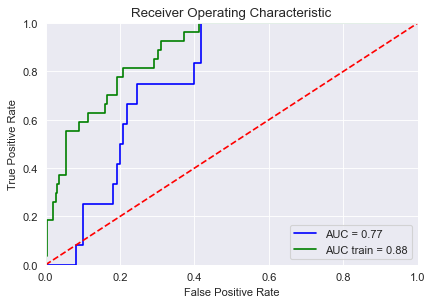

In [227]:
# calculate the fpr and tpr for all thresholds of the classification
probs_train = logmodel.predict_proba(X_train_regular)
preds_train = probs_train[:,1]

probs = logmodel.predict_proba(X_test_regular)
preds = probs[:,1]

fpr_train, tpr_train, threshold = metrics.roc_curve(y_train_regular, preds_train)
fpr, tpr, threshold = metrics.roc_curve(y_test_regular, preds)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

AUC_score_train_results['Regular ward']['Logistic Regression'] = roc_auc_train
AUC_score_test_results['Regular ward']['Logistic Regression'] = roc_auc

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_train, tpr_train, 'g', label = 'AUC train = %0.2f' % roc_auc_train)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


***Conclusion:*** There are some threshold values in which the model is performing worse than 0.5 AUC which is not ideal.

### 5.2.2. SVM with Grid Search

In [228]:
# Defining parameter range to grid search
C = [0.01,0.1,0.5,1,10,100]
param_gridSVM = {'C': C}

# Define grid instance
gridSVM = GridSearchCV(cv=5, estimator=svm.SVC(class_weight='balanced',kernel='linear',random_state=101,probability=True), param_grid=param_gridSVM, scoring='roc_auc') 

# Initialize grid search, fitting the best model
gridSVM.fit(X_train_regular, y_train_regular)

GridSearchCV(cv=5,
             estimator=SVC(class_weight='balanced', kernel='linear',
                           probability=True, random_state=101),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10, 100]}, scoring='roc_auc')

**Best parameters of the grid search for regular ward:**

In [229]:
gridSVM.best_params_

{'C': 1}

In [230]:
predictions_regular_SVM = gridSVM.predict(X_test_COVID)
predictions_train_regular_SVM = gridSVM.predict(X_train_COVID)

In [231]:
print(classification_report(y_test_regular,predictions_regular_SVM))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76       110
           1       0.05      0.17      0.08        12

    accuracy                           0.62       122
   macro avg       0.47      0.42      0.42       122
weighted avg       0.80      0.62      0.70       122



In [232]:
confusion_matrix(y_test_regular,predictions_regular_SVM) 

array([[74, 36],
       [10,  2]], dtype=int64)

In [233]:
#storing the results for SVM with grid search
F1_score_train_results['Regular ward']['SVM with Grid'] = f1_score(y_train_regular, predictions_train_regular_SVM)
F1_score_test_results['Regular ward']['SVM with Grid'] = f1_score(y_test_regular, predictions_regular_SVM)


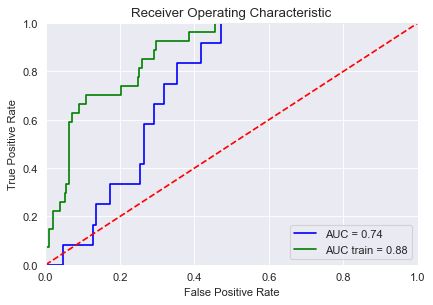

In [234]:
# calculate the fpr and tpr for all thresholds of the classification
probs_train = gridSVM.predict_proba(X_train_regular)
preds_train = probs_train[:,1]

probs = gridSVM.predict_proba(X_test_regular)
preds = probs[:,1]

fpr_train, tpr_train, threshold = metrics.roc_curve(y_train_regular, preds_train)
fpr, tpr, threshold = metrics.roc_curve(y_test_regular, preds)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

AUC_score_train_results['Regular ward']['SVM with Grid'] = roc_auc_train
AUC_score_test_results['Regular ward']['SVM with Grid'] = roc_auc

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_train, tpr_train, 'g', label = 'AUC train = %0.2f' % roc_auc_train)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 5.2.3. SVM with Grid Search and PCA

In [235]:
pca = PCA()
scaler = StandardScaler()
model = svm.SVC(probability=True,class_weight='balanced',kernel='linear')
pipe = Pipeline(steps=[("scaler",scaler),("pca",pca),("svm",model)])

param_grid= {
    "pca__n_components": [5,7,8,9,10,11,12,13,15,17],
    "svm__C": [0.01,0.1,0.5,1,10,100]
}

search = GridSearchCV(pipe,param_grid,cv=5,n_jobs=2)
search.fit(X_train_regular,y_train_regular)

print(search.best_params_)

{'pca__n_components': 11, 'svm__C': 0.01}


In [236]:
predictions_regular = search.predict(X_test_regular)
predictions_train_regular = search.predict(X_train_regular)

In [237]:
print(classification_report(y_test_regular,predictions_regular))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84       110
           1       0.24      0.75      0.36        12

    accuracy                           0.74       122
   macro avg       0.60      0.74      0.60       122
weighted avg       0.89      0.74      0.79       122



In [238]:
#storing the results for SVM with Grid Search and PCA
F1_score_train_results['Regular ward']['SVM with Grid + PCA'] = f1_score(y_train_regular, predictions_train_regular)
F1_score_test_results['Regular ward']['SVM with Grid + PCA'] = f1_score(y_test_regular, predictions_regular)

In [147]:
confusion_matrix(y_test_regular,predictions_regular) 

array([[81, 29],
       [ 3,  9]], dtype=int64)

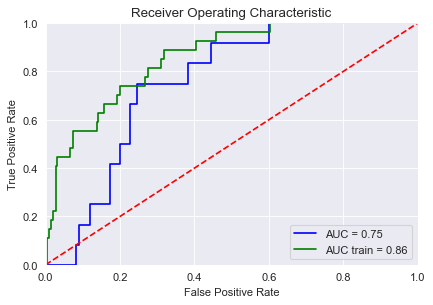

In [239]:
# calculate the fpr and tpr for all thresholds of the classification
probs_train = search.predict_proba(X_train_regular)
preds_train = probs_train[:,1]

probs = search.predict_proba(X_test_regular)
preds = probs[:,1]

fpr_train, tpr_train, threshold = metrics.roc_curve(y_train_regular, preds_train)
fpr, tpr, threshold = metrics.roc_curve(y_test_regular, preds)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

AUC_score_train_results['Regular ward']['SVM with Grid + PCA'] = roc_auc_train
AUC_score_test_results['Regular ward']['SVM with Grid + PCA'] = roc_auc

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_train, tpr_train, 'g', label = 'AUC train = %0.2f' % roc_auc_train)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 5.3. Semi intensive unit

In [242]:
#We get the optimal features for semi intensive unit
df_semi_intensive=df[['patient_age_quantile','hematocrit_semi_intensive',
       'hemoglobin_semi_intensive', 'platelets_semi_intensive', 'mean_platelet_volume_semi_intensive', 'red_blood_cells_semi_intensive',
       'lymphocytes_semi_intensive', 'mean_corpuscular_hemoglobin_concentration_mchc_semi_intensive',
       'leukocytes_semi_intensive', 'basophils_semi_intensive', 'mean_corpuscular_hemoglobin_mch_semi_intensive',
       'eosinophils_semi_intensive', 'mean_corpuscular_volume_mcv_semi_intensive', 'monocytes_semi_intensive',
       'red_blood_cell_distribution_width_rdw_semi_intensive','Nulls','Nulls_influenza_a','semi_intensive_unit']]

In [243]:
#we split the data between train and test
X_train_semi, X_test_semi, y_train_semi, y_test_semi = train_test_split(df_semi_intensive.drop(['semi_intensive_unit'],axis=1),
                                                   df_semi_intensive['semi_intensive_unit'], test_size=0.30, random_state=101)


### 5.3.1. Logistic Regression

In [244]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(X_train_semi,y_train_semi)

LogisticRegression(class_weight='balanced')

In [245]:
predictions_semi = logmodel.predict(X_test_semi)
predictions_train_semi = logmodel.predict(X_train_semi)

In [246]:
print(classification_report(y_test_semi,predictions_semi))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83       111
           1       0.19      0.64      0.29        11

    accuracy                           0.72       122
   macro avg       0.57      0.68      0.56       122
weighted avg       0.88      0.72      0.78       122



In [253]:
#storing the results for Logistic Regression
F1_score_train_results['Semi intensive unit']['Logistic Regression'] = f1_score(y_train_semi, predictions_train_semi)
F1_score_test_results['Semi intensive unit']['Logistic Regression'] = f1_score(y_test_semi, predictions_semi)

In [157]:
confusion_matrix(y_test_semi,predictions_semi)

array([[81, 30],
       [ 4,  7]], dtype=int64)

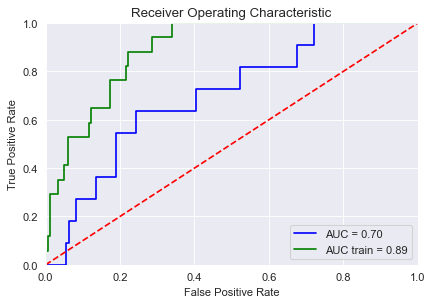

In [248]:
# calculate the fpr and tpr for all thresholds of the classification
probs_train = logmodel.predict_proba(X_train_semi)
preds_train = probs_train[:,1]

probs = logmodel.predict_proba(X_test_semi)
preds = probs[:,1]

fpr_train, tpr_train, threshold = metrics.roc_curve(y_train_semi, preds_train)
fpr, tpr, threshold = metrics.roc_curve(y_test_semi, preds)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

AUC_score_train_results['Semi intensive unit']['Logistic Regression'] = roc_auc_train
AUC_score_test_results['Semi intensive unit']['Logistic Regression'] = roc_auc

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_train, tpr_train, 'g', label = 'AUC train = %0.2f' % roc_auc_train)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 5.3.2. SVM with Grid Search

In [249]:
# Defining parameter range to grid search
C = [0.01,0.1,0.5,1,10,100]
param_gridSVM = {'C': C}

# Define grid instance
gridSVM = GridSearchCV(cv=5, estimator=svm.SVC(class_weight='balanced',kernel='linear',random_state=101,probability=True), param_grid=param_gridSVM, scoring='roc_auc') 

# Initialize grid search, fitting the best model
gridSVM.fit(X_train_semi, y_train_semi)

GridSearchCV(cv=5,
             estimator=SVC(class_weight='balanced', kernel='linear',
                           probability=True, random_state=101),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10, 100]}, scoring='roc_auc')

In [250]:
gridSVM.best_params_

{'C': 0.01}

In [251]:
predictions_semi = gridSVM.predict(X_test_semi)
predictions_train_semi = gridSVM.predict(X_train_semi)

In [252]:
print(classification_report(y_test_semi,predictions_semi))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85       111
           1       0.21      0.64      0.32        11

    accuracy                           0.75       122
   macro avg       0.58      0.70      0.58       122
weighted avg       0.89      0.75      0.80       122



In [254]:
#storing the results for SVM with Grid Search
F1_score_train_results['Semi intensive unit']['SVM with Grid'] = f1_score(y_train_semi, predictions_train_semi)
F1_score_test_results['Semi intensive unit']['SVM with Grid'] = f1_score(y_test_semi, predictions_semi)

In [164]:
confusion_matrix(y_test_semi,predictions_semi)

array([[85, 26],
       [ 4,  7]], dtype=int64)

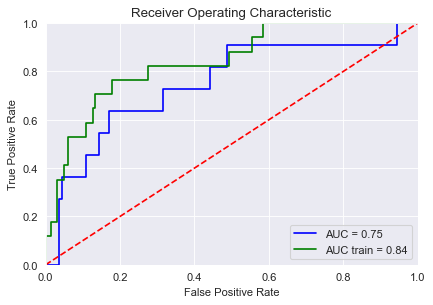

In [256]:
# calculate the fpr and tpr for all thresholds of the classification
probs_train = gridSVM.predict_proba(X_train_semi)
preds_train = probs_train[:,1]

probs = gridSVM.predict_proba(X_test_semi)
preds = probs[:,1]

fpr_train, tpr_train, threshold = metrics.roc_curve(y_train_semi, preds_train)
fpr, tpr, threshold = metrics.roc_curve(y_test_semi, preds)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

AUC_score_train_results['Semi intensive unit']['SVM with Grid'] = roc_auc_train
AUC_score_test_results['Semi intensive unit']['SVM with Grid'] = roc_auc

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_train, tpr_train, 'g', label = 'AUC train = %0.2f' % roc_auc_train)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 5.3.3. SVM with Grid Search and PCA

In [257]:
pca = PCA()
scaler = StandardScaler()
model = svm.SVC(probability=True,class_weight='balanced',kernel='linear')
pipe = Pipeline(steps=[("scaler",scaler),("pca",pca),("svm",model)])

param_grid= {
    "pca__n_components": [5,7,8,9,10,11,12,13,15,17],
    "svm__C": [0.01,0.1,0.5,1,10,100]
}

search = GridSearchCV(pipe,param_grid,cv=5,n_jobs=2)
search.fit(X_train_semi,y_train_semi)

print(search.best_params_)

{'pca__n_components': 5, 'svm__C': 0.01}


In [258]:
predictions_semi = search.predict(X_test_semi)
predictions_train_semi = search.predict(X_train_semi)

In [259]:
print(classification_report(y_test_semi,predictions_semi))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       111
           1       0.20      0.55      0.29        11

    accuracy                           0.76       122
   macro avg       0.57      0.66      0.57       122
weighted avg       0.88      0.76      0.81       122



In [260]:
#storing the results for SVM with Grid Search and PCA
F1_score_train_results['Semi intensive unit']['SVM with Grid + PCA'] = f1_score(y_train_semi, predictions_train_semi)
F1_score_test_results['Semi intensive unit']['SVM with Grid + PCA'] = f1_score(y_test_semi, predictions_semi)

In [261]:
confusion_matrix(y_test_semi,predictions_semi)

array([[87, 24],
       [ 5,  6]], dtype=int64)

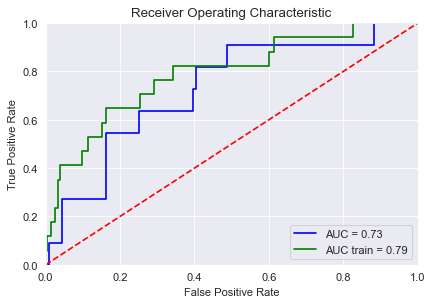

In [262]:
probs_train = search.predict_proba(X_train_semi)
preds_train = probs_train[:,1]

probs = search.predict_proba(X_test_semi)
preds = probs[:,1]

fpr_train, tpr_train, threshold = metrics.roc_curve(y_train_semi, preds_train)
fpr, tpr, threshold = metrics.roc_curve(y_test_semi, preds)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

AUC_score_train_results['Semi intensive unit']['SVM with Grid + PCA'] = roc_auc_train
AUC_score_test_results['Semi intensive unit']['SVM with Grid + PCA'] = roc_auc

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_train, tpr_train, 'g', label = 'AUC train = %0.2f' % roc_auc_train)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 5.4. Intensive care unit

In [265]:
#We get the optimal features for intensive care unit
df_intensive=df[['patient_age_quantile','hematocrit_intensive',
       'hemoglobin_intensive', 'platelets_intensive', 'mean_platelet_volume_intensive', 'red_blood_cells_intensive',
       'lymphocytes_intensive', 'mean_corpuscular_hemoglobin_concentration_mchc_intensive',
       'leukocytes_intensive', 'basophils_intensive', 'mean_corpuscular_hemoglobin_mch_intensive',
       'eosinophils_intensive', 'mean_corpuscular_volume_mcv_intensive', 'monocytes_intensive',
       'red_blood_cell_distribution_width_rdw_intensive','Nulls','Nulls_influenza_a','intensive_care_unit']]

In [266]:
#we split the data between train and test
X_train_intensive, X_test_intensive, y_train_intensive, y_test_intensive = train_test_split(df_intensive.drop(['intensive_care_unit'],axis=1),
                                                   df_intensive['intensive_care_unit'], test_size=0.30, random_state=101)


### 5.4.1. Logistic Regression

In [267]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(X_train_intensive,y_train_intensive)

LogisticRegression(class_weight='balanced')

In [268]:
predictions_intensive = logmodel.predict(X_test_intensive)
predictions_train_intensive = logmodel.predict(X_train_intensive)

In [269]:
print(classification_report(y_test_intensive,predictions_intensive))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       118
           1       0.20      0.50      0.29         4

    accuracy                           0.92       122
   macro avg       0.59      0.72      0.62       122
weighted avg       0.96      0.92      0.93       122



In [270]:
#storing the results for Logistic Regression
F1_score_train_results['Intensive care unit']['Logistic Regression'] = f1_score(y_train_intensive, predictions_train_intensive)
F1_score_test_results['Intensive care unit']['Logistic Regression'] = f1_score(y_test_intensive, predictions_intensive)

In [271]:
confusion_matrix(y_test_intensive,predictions_intensive)

array([[110,   8],
       [  2,   2]], dtype=int64)

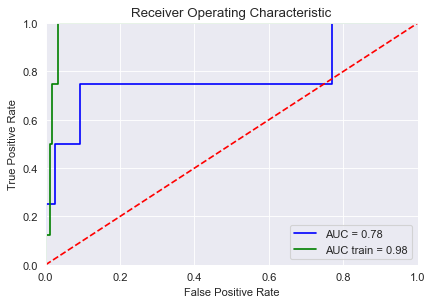

In [272]:
# calculate the fpr and tpr for all thresholds of the classification
probs_train = logmodel.predict_proba(X_train_intensive)
preds_train = probs_train[:,1]

probs = logmodel.predict_proba(X_test_intensive)
preds = probs[:,1]

fpr_train, tpr_train, threshold = metrics.roc_curve(y_train_intensive, preds_train)
fpr, tpr, threshold = metrics.roc_curve(y_test_intensive, preds)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

AUC_score_train_results['Intensive care unit']['Logistic Regression']  = roc_auc_train
AUC_score_test_results['Intensive care unit']['Logistic Regression'] = roc_auc

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_train, tpr_train, 'g', label = 'AUC train = %0.2f' % roc_auc_train)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Note:** Since we only have 4 positives in intensive care unit in test set, TP rate in some ranges do not change. This is because changing the treshold values only sometimes affect the classification of 1's. 

### 5.4.2. SVM with Grid Search

In [280]:
# Defining parameter range to grid search
C = [0.01,0.1,0.5,1,10,100]
param_gridSVM = {'C': C}

# Define grid instance
gridSVM = GridSearchCV(cv=5, estimator=svm.SVC(class_weight='balanced',kernel='linear',random_state=101,probability=True), param_grid=param_gridSVM, scoring='roc_auc') 

# Initialize grid search, fitting the best model
gridSVM.fit(X_train_intensive, y_train_intensive)

GridSearchCV(cv=5,
             estimator=SVC(class_weight='balanced', kernel='linear',
                           probability=True, random_state=101),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10, 100]}, scoring='roc_auc')

In [281]:
gridSVM.best_params_

{'C': 0.01}

In [282]:
predictions_intensive = gridSVM.predict(X_test_intensive)
predictions_train_intensive = gridSVM.predict(X_train_intensive)

In [283]:
print(classification_report(y_test_intensive,predictions_intensive))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       118
           1       0.15      0.75      0.25         4

    accuracy                           0.85       122
   macro avg       0.57      0.80      0.58       122
weighted avg       0.96      0.85      0.90       122



In [284]:
#storing the results for SVM with Grid Search
F1_score_train_results['Intensive care unit']['SVM with Grid'] = f1_score(y_train_intensive, predictions_train_intensive)
F1_score_test_results['Intensive care unit']['SVM with Grid'] = f1_score(y_test_intensive, predictions_intensive)

In [278]:
confusion_matrix(y_test_intensive,predictions_intensive)

array([[101,  17],
       [  1,   3]], dtype=int64)

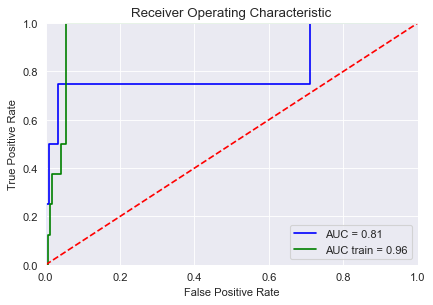

In [285]:
# calculate the fpr and tpr for all thresholds of the classification
probs_train = gridSVM.predict_proba(X_train_intensive)
preds_train = probs_train[:,1]

probs = gridSVM.predict_proba(X_test_intensive)
preds = probs[:,1]

fpr_train, tpr_train, threshold = metrics.roc_curve(y_train_intensive, preds_train)
fpr, tpr, threshold = metrics.roc_curve(y_test_intensive, preds)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

AUC_score_train_results['Intensive care unit']['SVM with Grid']  = roc_auc_train
AUC_score_test_results['Intensive care unit']['SVM with Grid'] = roc_auc

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_train, tpr_train, 'g', label = 'AUC train = %0.2f' % roc_auc_train)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 5.4.3. SVM with Grid Search and PCA

In [286]:
pca = PCA()
scaler = StandardScaler()
model = svm.SVC(probability=True,class_weight='balanced',kernel='linear')
pipe = Pipeline(steps=[("scaler",scaler),("pca",pca),("svm",model)])

param_grid= {
    "pca__n_components": [5,7,8,9,10,11,12,13,15,17],
    "svm__C": [0.01,0.1,0.5,1,10,100]
}

search = GridSearchCV(pipe,param_grid,cv=5,n_jobs=2)
search.fit(X_train_intensive,y_train_intensive)

print(search.best_params_)

{'pca__n_components': 17, 'svm__C': 10}


In [289]:
predictions_intensive = search.predict(X_test_intensive)
predictions_train_intensive = search.predict(X_train_intensive)

In [288]:
print(classification_report(y_test_intensive,predictions_intensive))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       118
           1       0.17      0.25      0.20         4

    accuracy                           0.93       122
   macro avg       0.57      0.60      0.58       122
weighted avg       0.95      0.93      0.94       122



In [290]:
#storing the results for SVM with Grid Search and PCA
F1_score_train_results['Intensive care unit']['SVM with Grid + PCA'] = f1_score(y_train_intensive, predictions_train_intensive)
F1_score_test_results['Intensive care unit']['SVM with Grid + PCA'] = f1_score(y_test_intensive, predictions_intensive)

In [188]:
confusion_matrix(y_test_intensive,predictions_intensive)

array([[101,  17],
       [  1,   3]], dtype=int64)

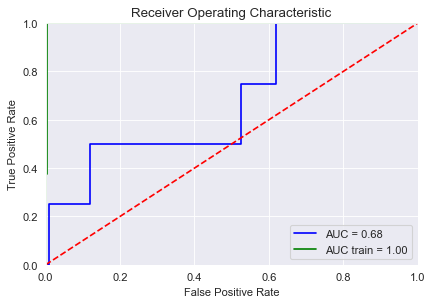

In [294]:
# calculate the fpr and tpr for all thresholds of the classification
probs_train = search.predict_proba(X_train_intensive)
preds_train = probs_train[:,1]

probs = search.predict_proba(X_test_intensive)
preds = probs[:,1]

fpr_train, tpr_train, threshold = metrics.roc_curve(y_train_intensive, preds_train)
fpr, tpr, threshold = metrics.roc_curve(y_test_intensive, preds)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

AUC_score_train_results['Intensive care unit']['SVM with Grid + PCA']  = roc_auc_train
AUC_score_test_results['Intensive care unit']['SVM with Grid + PCA'] = roc_auc

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_train, tpr_train, 'g', label = 'AUC train = %0.2f' % roc_auc_train)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 5.5. Results and comparision of models

Below we compare 3 models for each target variables and give final thoughts about which model would be optimal to use in each case.

#### 5.5.1. COVID

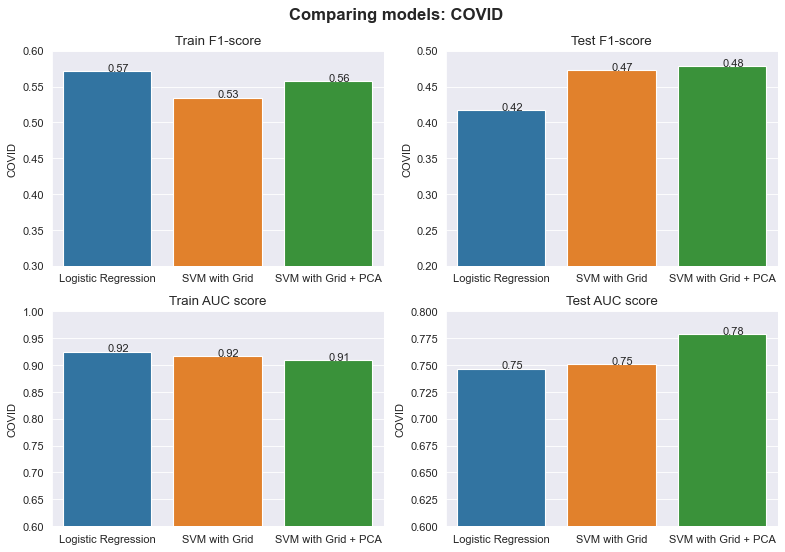

In [369]:
fig, axes = plt.subplots(2, 2)
fig.set_figheight(7)
fig.set_figwidth(10)
    
sns.barplot(x=F1_score_train_results.index,y='COVID',data=F1_score_train_results,ax=axes[0,0])
sns.barplot(x=F1_score_test_results.index,y='COVID',data=F1_score_test_results,ax=axes[0,1])
sns.barplot(x=AUC_score_train_results.index,y='COVID',data=AUC_score_train_results,ax=axes[1,0])
sns.barplot(x=AUC_score_test_results.index,y='COVID',data=AUC_score_test_results,ax=axes[1,1])


axes[0,0].title.set_text('Train F1-score') 
axes[0,0].set_ylim([0.3,0.6])
axes[0,1].title.set_text('Test F1-score')
axes[0,1].set_ylim([0.2,0.5])
axes[1,0].title.set_text('Train AUC score')
axes[1,0].set_ylim([0.6,1])
axes[1,1].title.set_text('Test AUC score')
axes[1,1].set_ylim([0.6,0.8])

for x in range(2):
    for y in range(2):
        for p in axes[x,y].patches:
            b = p.get_bbox()
            val = "{:.2f}".format(b.y1 + b.y0)        
            axes[x,y].annotate(val, ((b.x0 + b.x1)/2, b.y1))

plt.suptitle('Comparing models: COVID',fontweight='bold',fontsize=15)
fig.tight_layout()


***Conclusion:*** In general the models perform well in both metrics considering the fact that the dataset is very small and imbalanced. SWM with Grid Search and PCA outperforms other models in predicting Covid. When comparing the train and test results, it has the lowest gap in F1-score and AUC score. 

**5.5.2. Regular Ward**

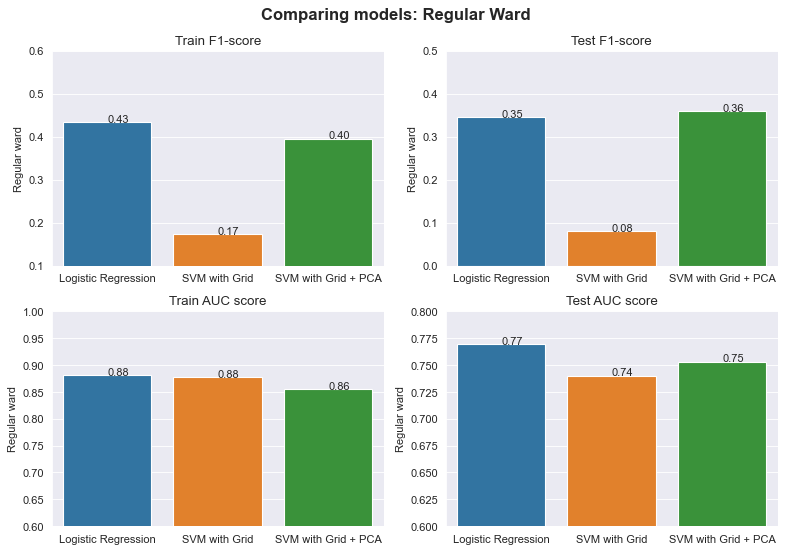

In [374]:
fig, axes = plt.subplots(2, 2)
fig.set_figheight(7)
fig.set_figwidth(10)
    
sns.barplot(x=F1_score_train_results.index,y='Regular ward',data=F1_score_train_results,ax=axes[0,0])
sns.barplot(x=F1_score_test_results.index,y='Regular ward',data=F1_score_test_results,ax=axes[0,1])
sns.barplot(x=AUC_score_train_results.index,y='Regular ward',data=AUC_score_train_results,ax=axes[1,0])
sns.barplot(x=AUC_score_test_results.index,y='Regular ward',data=AUC_score_test_results,ax=axes[1,1])


axes[0,0].title.set_text('Train F1-score') 
axes[0,0].set_ylim([0.1,0.6])
axes[0,1].title.set_text('Test F1-score')
axes[0,1].set_ylim([0,0.5])
axes[1,0].title.set_text('Train AUC score')
axes[1,0].set_ylim([0.6,1])
axes[1,1].title.set_text('Test AUC score')
axes[1,1].set_ylim([0.6,0.8])

for x in range(2):
    for y in range(2):
        for p in axes[x,y].patches:
            b = p.get_bbox()
            val = "{:.2f}".format(b.y1 + b.y0)        
            axes[x,y].annotate(val, ((b.x0 + b.x1)/2, b.y1))

plt.suptitle('Comparing models: Regular Ward',fontweight='bold',fontsize=15)
fig.tight_layout()


***Conclusion:*** Adding PCA before doing SVM with Grid Search have a significant impact in predicting regular ward. Both logistic regression and SVM with PCA performs well and can be considered as optimal models to use for regular ward.

**5.5.3. Semi intensive unit**

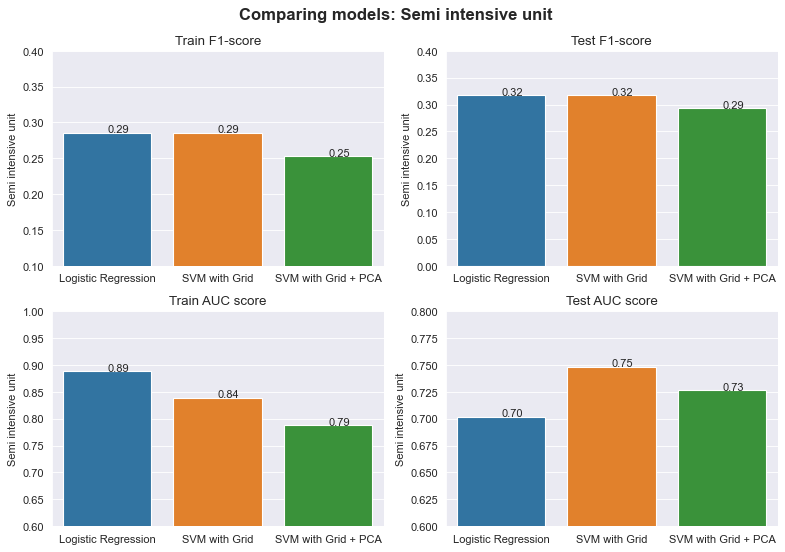

In [381]:
fig, axes = plt.subplots(2, 2)
fig.set_figheight(7)
fig.set_figwidth(10)
    
sns.barplot(x=F1_score_train_results.index,y='Semi intensive unit',data=F1_score_train_results,ax=axes[0,0])
sns.barplot(x=F1_score_test_results.index,y='Semi intensive unit',data=F1_score_test_results,ax=axes[0,1])
sns.barplot(x=AUC_score_train_results.index,y='Semi intensive unit',data=AUC_score_train_results,ax=axes[1,0])
sns.barplot(x=AUC_score_test_results.index,y='Semi intensive unit',data=AUC_score_test_results,ax=axes[1,1])


axes[0,0].title.set_text('Train F1-score') 
axes[0,0].set_ylim([0.1,0.4])
axes[0,1].title.set_text('Test F1-score')
axes[0,1].set_ylim([0,0.4])
axes[1,0].title.set_text('Train AUC score')
axes[1,0].set_ylim([0.6,1])
axes[1,1].title.set_text('Test AUC score')
axes[1,1].set_ylim([0.6,0.8])

for x in range(2):
    for y in range(2):
        for p in axes[x,y].patches:
            b = p.get_bbox()
            val = "{:.2f}".format(b.y1 + b.y0)        
            axes[x,y].annotate(val, ((b.x0 + b.x1)/2, b.y1))

plt.suptitle('Comparing models: Semi intensive unit',fontweight='bold',fontsize=15)
fig.tight_layout()


***Conclusion:*** In predicting semi intensive unit, SVM with Grid Search and PCA seems to be the best fit especially because it avoids overfitting more than other two models.

**5.5.4. Intensive care unit**

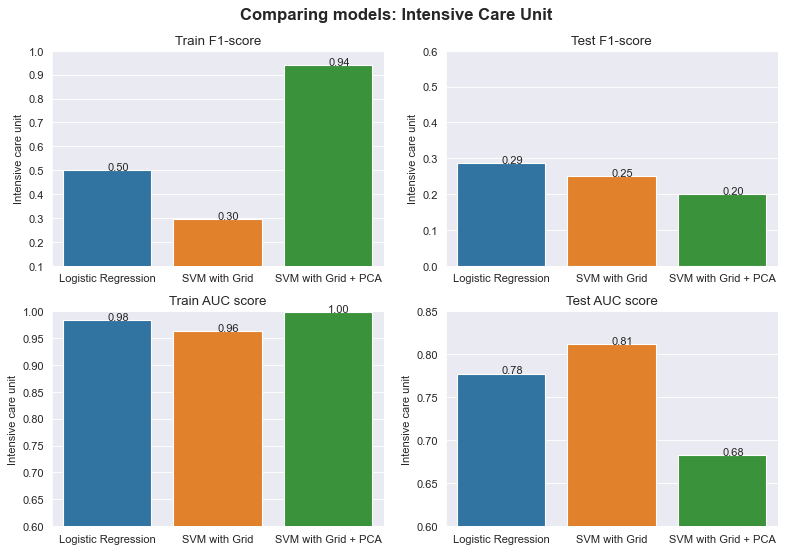

In [382]:
fig, axes = plt.subplots(2, 2)
fig.set_figheight(7)
fig.set_figwidth(10)
    
sns.barplot(x=F1_score_train_results.index,y='Intensive care unit',data=F1_score_train_results,ax=axes[0,0])
sns.barplot(x=F1_score_test_results.index,y='Intensive care unit',data=F1_score_test_results,ax=axes[0,1])
sns.barplot(x=AUC_score_train_results.index,y='Intensive care unit',data=AUC_score_train_results,ax=axes[1,0])
sns.barplot(x=AUC_score_test_results.index,y='Intensive care unit',data=AUC_score_test_results,ax=axes[1,1])


axes[0,0].title.set_text('Train F1-score') 
axes[0,0].set_ylim([0.1,1])
axes[0,1].title.set_text('Test F1-score')
axes[0,1].set_ylim([0,0.6])
axes[1,0].title.set_text('Train AUC score')
axes[1,0].set_ylim([0.6,1])
axes[1,1].title.set_text('Test AUC score')
axes[1,1].set_ylim([0.6,0.85])

for x in range(2):
    for y in range(2):
        for p in axes[x,y].patches:
            b = p.get_bbox()
            val = "{:.2f}".format(b.y1 + b.y0)        
            axes[x,y].annotate(val, ((b.x0 + b.x1)/2, b.y1))

plt.suptitle('Comparing models: Intensive Care Unit',fontweight='bold',fontsize=15)
fig.tight_layout()

***Conclusion:*** SVM with Grid Search and PCA is obviously suffering from overfitting and can not be used to predict intensive care unit. Logistic Regression and SVM with Grid Search performs similarly and can both be used.